
# EDA 

 ## Assignment Questions


# EDA - 1 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
'''
The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike 
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for 
used bikes. 
'''

'\nThe dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike \nmarket. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for \nused bikes. \n'

## Title: Bike Details Dataset

In [3]:
'''
Source: 
The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale 
platforms.  
Description: 
The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand 
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for 
resale value prediction, market analysis, and understanding buyer preferences.  
The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive 
view of the second-hand bike market. 

'''

"\nSource: \nThe dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale \nplatforms.  \nDescription: \nThe dataset comprises 1061 records of used bike listings. These records include details about the bike's brand \nand model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for \nresale value prediction, market analysis, and understanding buyer preferences.  \nThe dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive \nview of the second-hand bike market. \n\n"

# Title: Bike Details Dataset

In [4]:
'''
1.=name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
2.selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
3.year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
4.seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
5.owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
6.km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
7.ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

'''

'\n1.=name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z\n2.selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z\n3.year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z\n4.seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z\n5.owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z\n6.km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z\n7.ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).\n\n'

In [5]:
df=pd.read_csv("BIKE_DETAILS.csv")

In [6]:
df.shape

(1061, 7)

In [7]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [8]:
# 1.What is the range of selling prices in the dataset ?

selling_price_range = df["selling_price"].max() - df["selling_price"].min()
print(f"Selling Price of Bikes : {selling_price_range}")

Selling Price of Bikes : 755000


In [9]:
# 2.What is the median selling price for bikes in the dataset ?

median_value_for_selling_price=df["selling_price"].median()
print(f"Median value for selling price : {median_value_for_selling_price}")

Median value for selling price : 45000.0


In [10]:
# 3.What is the most common seller type?

most_seller_type=df["seller_type"].value_counts().idxmax()
print(f"Most seller type : {most_seller_type}")


Most seller type : Individual


In [11]:
#  4.How many bikes have driven more than 50,000 kilometers?  

most_km_driven=df.km_driven 
over_50000=0
for i in most_km_driven:
    if i >=50000:
        over_50000+=1
 
print(f"number of bikes are driven over 50000 : {over_50000}")

number of bikes are driven over 50000 : 207


In [12]:
# 5.What is the average km_driven value for each ownership type?

average_km_driven_per_owner=df.groupby("owner")["km_driven"].mean()
print(f"average km driven per owner : {average_km_driven_per_owner}")

average km driven per owner : owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [13]:
# 6. What proportion of bikes are from the year 2015 or older?

total_bikes=df["year"]
older_bikes=df[df["year"]>=2015]
count_olderbikes=len(older_bikes)
count_total_bikes=len(total_bikes)

proportion_older_bikes=count_olderbikes/count_total_bikes

print(f"The proportion of bikes from the year 2015 or older is:{proportion_older_bikes :.2f}")

The proportion of bikes from the year 2015 or older is:0.53


In [14]:
# 7.What is the trend of missing values across the dataset?

missing_value_trend=df.isna().sum()
print(f"The missing value trend : {missing_value_trend}")


The missing value trend : name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [19]:
# 8.What is the highest ex_showroom_price recorded, and for which bike?

max_ex_showroom_price=df["ex_showroom_price"].max()

bike_with_max_ex_showroom_price=df[df["ex_showroom_price"]==max_ex_showroom_price]["name"].iloc[0]
print(f"The highest ex_showroom_price is {max_ex_showroom_price} for this bike {bike_with_max_ex_showroom_price}")

The highest ex_showroom_price is 1278000.0 for this bike Harley-Davidson Street Bob


In [20]:
# 9.What is the total number of bikes listed by each seller type?

number_of_bike=df["seller_type"].value_counts()
print(f"The total number of bikes listed by each seller type {number_of_bike}")


The total number of bikes listed by each seller type seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


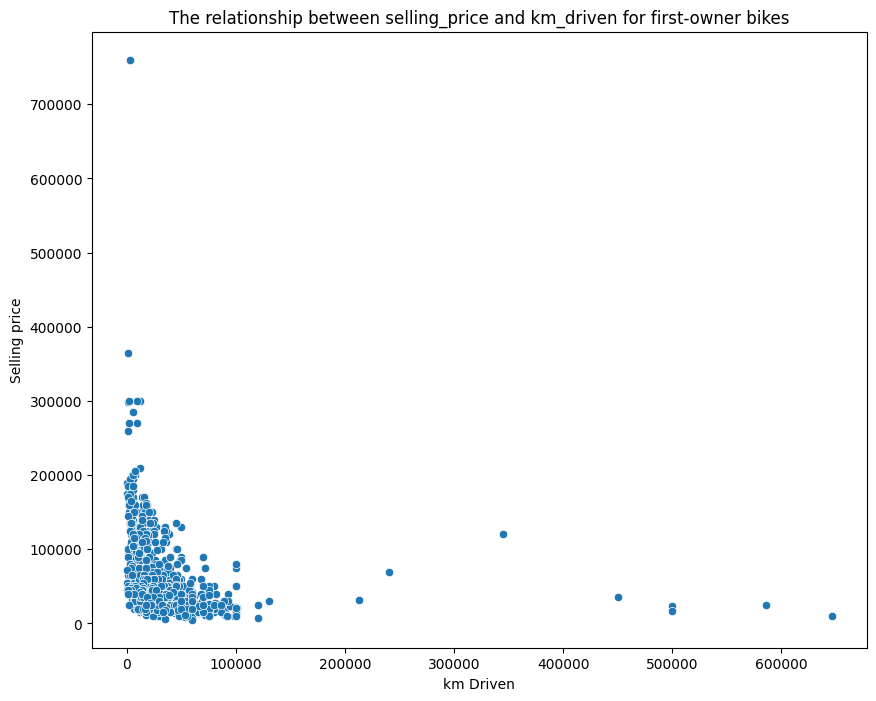

In [21]:
# 10.What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_bikes=df[df["owner"]=="1st owner"]

plt.figure(figsize=(10,8))
sns.scatterplot(data=first_owner_bikes,x="km_driven",y="selling_price")
plt.title("The relationship between selling_price and km_driven for first-owner bikes")
plt.xlabel("km Driven")
plt.ylabel("Selling price")
plt.show()


In [22]:
# 11.Identify and remove outliers in the km_driven column using the IQR method?

q1=df["km_driven"].quantile(0.25)
q3=df["km_driven"].quantile(0.75)

iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3-1.5*iqr

outlier=df[df["km_driven"]<lower_bound] | df[df["km_driven"]>upper_bound]

removed_outlier=df[~((df["km_driven"]<lower_bound)| (df["km_driven"]>upper_bound))]


print(f"Number of outliers: {len(outlier)}")
print(f"Number of records after removing outliers: {len(removed_outlier)}")

Number of outliers: 1061
Number of records after removing outliers: 0


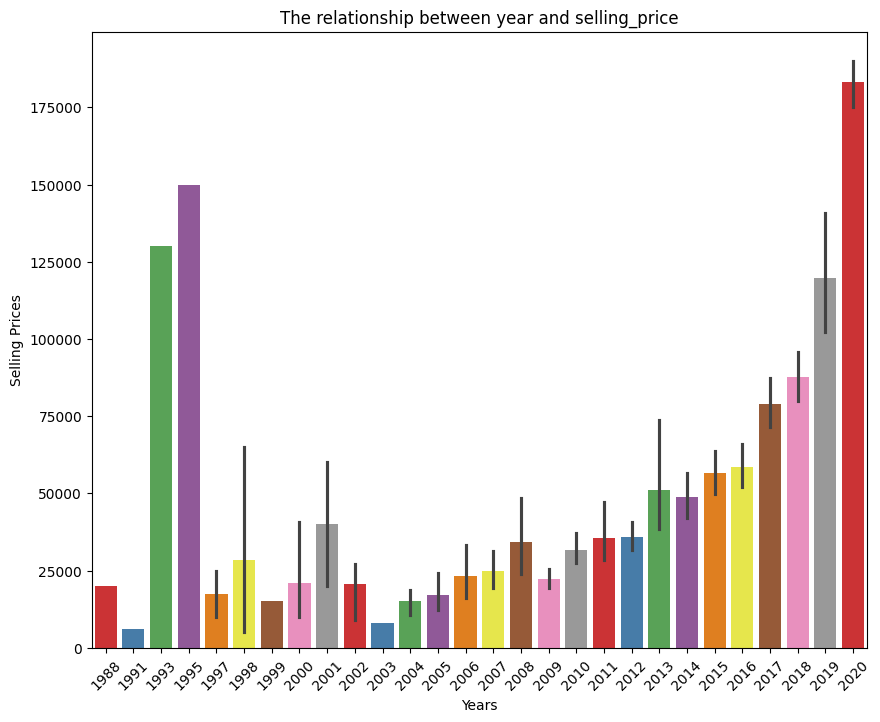

In [23]:
# 12.Perform a bivariate analysis to visualize the relationship between year and selling_price?

plt.figure(figsize=(10,8))
sns.barplot(x="year",y="selling_price",data=df,palette="Set1")
plt.title("The relationship between year and selling_price")
plt.xticks(rotation=45)
plt.xlabel("Years")
plt.ylabel("Selling Prices")
plt.show()


In [24]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [25]:
# 13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year=2024
df["age"]=current_year-df["year"]
df["depreciation"]=(df["ex_showroom_price"]-df["selling_price"])/df["age"]
average_depreciation=df["depreciation"].mean()
print(f"The average depreciation in selling price based on the bike's age {average_depreciation: .2f}")

The average depreciation in selling price based on the bike's age  2962.70


In [26]:
# 14.Which bike names are priced significantly above the average price for their manufacturing year?

avg_price = df.groupby("year")["selling_price"].mean()
std_price = df.groupby("year")["selling_price"].std()

df = df.merge(avg_price.rename("avg_selling_price"), on="year")
df = df.merge(std_price.rename("std_selling_price"), on="year")

significantly_above_avg = df[df["selling_price"] > df["avg_selling_price"] + df["std_selling_price"]]

bike_names_above_avg = significantly_above_avg["name"].unique()

print("Bikes priced significantly above the average price for their manufacturing year:")
for bike in bike_names_above_avg:
    print(bike)

Bikes priced significantly above the average price for their manufacturing year:
Royal Enfield Classic Gunmetal Grey
Royal Enfield Bullet 350 [2007-2011]
Yamaha YZF R3
Royal Enfield Thunderbird 350
Honda CBR-250R
KTM 390 Duke
Royal Enfield Electra 5 S
Royal Enfield Bullet 350
Royal Enfield Electra 4 S
Mahindra Mojo XT300
Royal Enfield Thunderbird 350X
Royal Enfield Classic Desert Storm
UM Renegade Commando
Royal Enfield Continental GT 650
Harley-Davidson Street Bob
KTM 390 Duke ABS [2013-2016]
Bajaj Dominar 400
KTM RC 390
Bajaj Pulsar 150
KTM RC 200
Royal Enfield Classic 350
Honda CB Unicorn 150
Royal Enfield Bullet 500
Bajaj Dominar 400 [2018]
Royal Enfield Interceptor 650
Royal Enfield Machismo
Kawasaki Ninja 650 [2018-2019]
Kawasaki Ninja 250R
Suzuki GSX S750
Yamaha Rx
Yamaha Fazer Dlx
Harley-Davidson Street 750
BMW G310GS
Royal Enfield Thunderbird 500
Royal Enfield Himalayan
Yamaha FZ25
Royal Enfield Classic Stealth Black
Royal Enfield Classic Squadron Blue
KTM 200 Duke
Royal Enfie

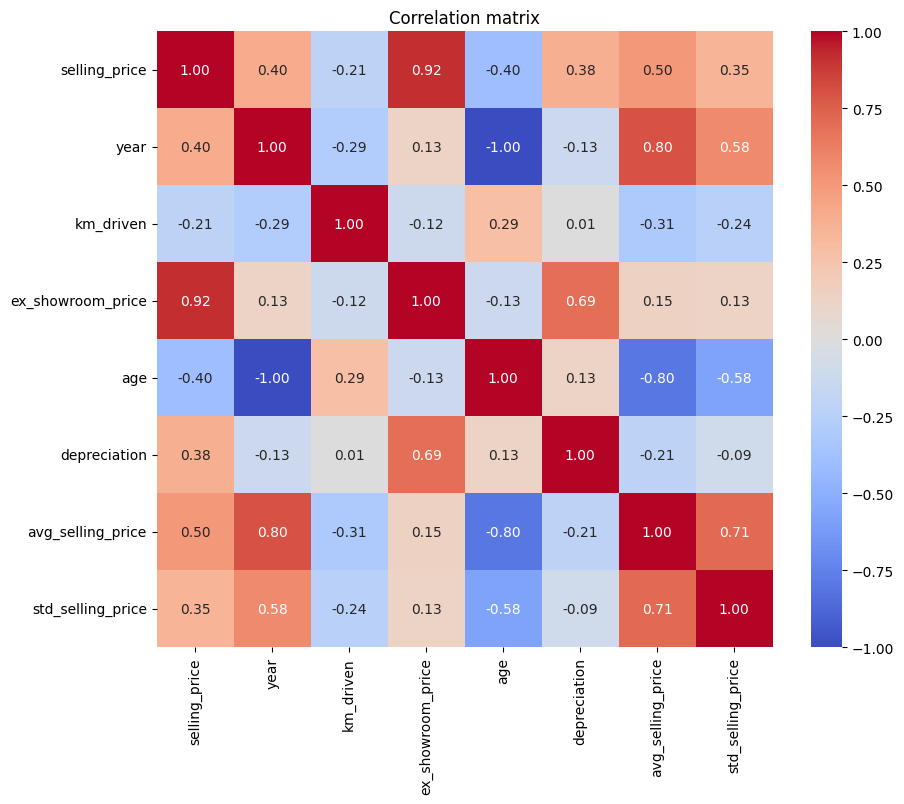

In [27]:
# 15.Develop a correlation matrix for numeric columns and visualize it using a heatmap. 

numeric_df=df.select_dtypes(include=[int,float])
correlation_matrix=numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",square=True)
plt.title("Correlation matrix")
plt.show()

# EDA - 2 

## About - Dataset: 
The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car 
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and 
consumer behavior.

## Title: Car Sale Dataset

### Source: 
The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.  
### Description: 
The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers 
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis, 
and understanding customer preferences. 


## Features:
1. Car_id: A unique identifier for each car in the dataset, helping to track individual car entries.
2. Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD.
3. Customer Name: The name of the customer who purchased the car, represented as a string.
4. Gender: The gender of the customer, categorized as "Male" or "Female.
5. Annual Income: The customer's annual income in US dollars, represented as a numeric value.
6. Dealer_Name: The name of the dealership selling the car, represented as a string.
7. Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.
8. Model: The specific model name of the car, such as "Corolla," "Civic," etc.
9. Engine: The engine type of the car, such as "V6," "I4," etc.
10. Transmission: The type of transmission in the car, either "Manual" or "Automatic.
11. Color: The color of the car, represented as a string (e.g., "Red," "Blue").
12. Price ($): The selling price of the car in US dollars.
13. Dealer_No: A unique identifier for each car dealer in the dataset.
14. Body Style: The body style of the car, such as "Sedan," "SUV," etc.
15. Phone: The phone number of the customer who purchased the car.
16. Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [29]:
df=pd.read_csv("Car Sale.csv")

In [30]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [31]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [32]:
df.Date

0          1/2/2022
1          1/2/2022
2          1/2/2022
3          1/2/2022
4          1/2/2022
            ...    
23901    12/31/2023
23902    12/31/2023
23903    12/31/2023
23904    12/31/2023
23905    12/31/2023
Name: Date, Length: 23906, dtype: object

In [33]:
df["Date"]=pd.to_datetime(df.Date)
df["Day"]=df['Date'].dt.day
df["month"]=df['Date'].dt.month
df["year"]=df['Date'].dt.year

In [34]:
df.drop("Date",axis=1,inplace=True)

In [35]:
df

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Day,month,year
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2,1,2022
1,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2,1,2022
2,C_CND_000003,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2,1,2022
3,C_CND_000004,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2,1,2022
4,C_CND_000005,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,31,12,2023
23902,C_CND_023903,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,31,12,2023
23903,C_CND_023904,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,31,12,2023
23904,C_CND_023905,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,31,12,2023


In [36]:
df["Dealer_No"]=df["Dealer_No "]

In [37]:
df.drop("Dealer_No ",axis=1,inplace=True)

In [38]:
df.Dealer_No

0        06457-3834
1        60504-7114
2        38701-8047
3        99301-3882
4        53546-9427
            ...    
23901    60504-7114
23902    06457-3834
23903    99301-3882
23904    53546-9427
23905    38701-8047
Name: Dealer_No, Length: 23906, dtype: object

In [39]:
df["Dealer_No"]=df["Dealer_No"].str.replace("-","")

In [40]:
df["Dealer_No"]=df["Dealer_No"].astype(int)

In [41]:
df.dtypes

Car_id           object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Body Style       object
Phone             int64
Dealer_Region    object
Day               int32
month             int32
year              int32
Dealer_No         int64
dtype: object

In [42]:
df.columns

Index(['Car_id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Body Style', 'Phone', 'Dealer_Region', 'Day', 'month', 'year',
       'Dealer_No'],
      dtype='object')

In [43]:
df

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Phone,Dealer_Region,Day,month,year,Dealer_No
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,8264678,Middletown,2,1,2022,64573834
1,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,6848189,Aurora,2,1,2022,605047114
2,C_CND_000003,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,7298798,Greenville,2,1,2022,387018047
3,C_CND_000004,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,6257557,Pasco,2,1,2022,993013882
4,C_CND_000005,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,7081483,Janesville,2,1,2022,535469427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,8583598,Pasco,31,12,2023,605047114
23902,C_CND_023903,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,7914229,Middletown,31,12,2023,64573834
23903,C_CND_023904,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,7659127,Scottsdale,31,12,2023,993013882
23904,C_CND_023905,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,Passenger,6030764,Austin,31,12,2023,535469427


In [44]:
df["Transmission"]=df["Transmission"].apply(lambda x:1 if x=="Auto" else 0)

In [45]:
df["Price"]=df["Price ($)"]
df.drop("Price ($)",inplace=True,axis=1)

## Questions: 

 

The average selling price for each dealer : Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                              

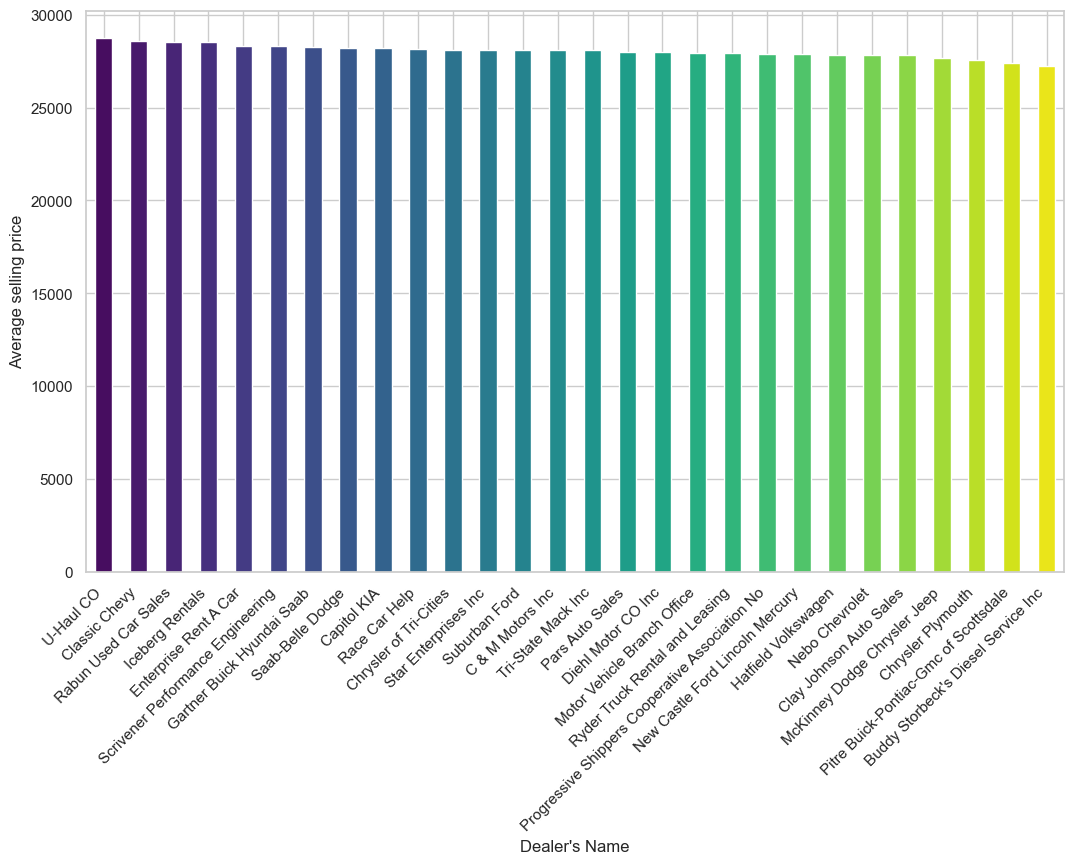

In [46]:
# 1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

avg_price_per_dealer=df.groupby("Dealer_Name")["Price"].mean().sort_values(ascending=False)

print(f"The average selling price for each dealer : {avg_price_per_dealer}")

sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(avg_price_per_dealer))


plt.figure(figsize=(10.9,8.8))
avg_price_per_dealer.plot(kind="bar",color=palette)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Dealer's Name")
plt.ylabel("Average selling price")
plt.tight_layout()
plt.show()

The car brand with the highest variation in prices is Lincoln with a standard deviation of 19658.05


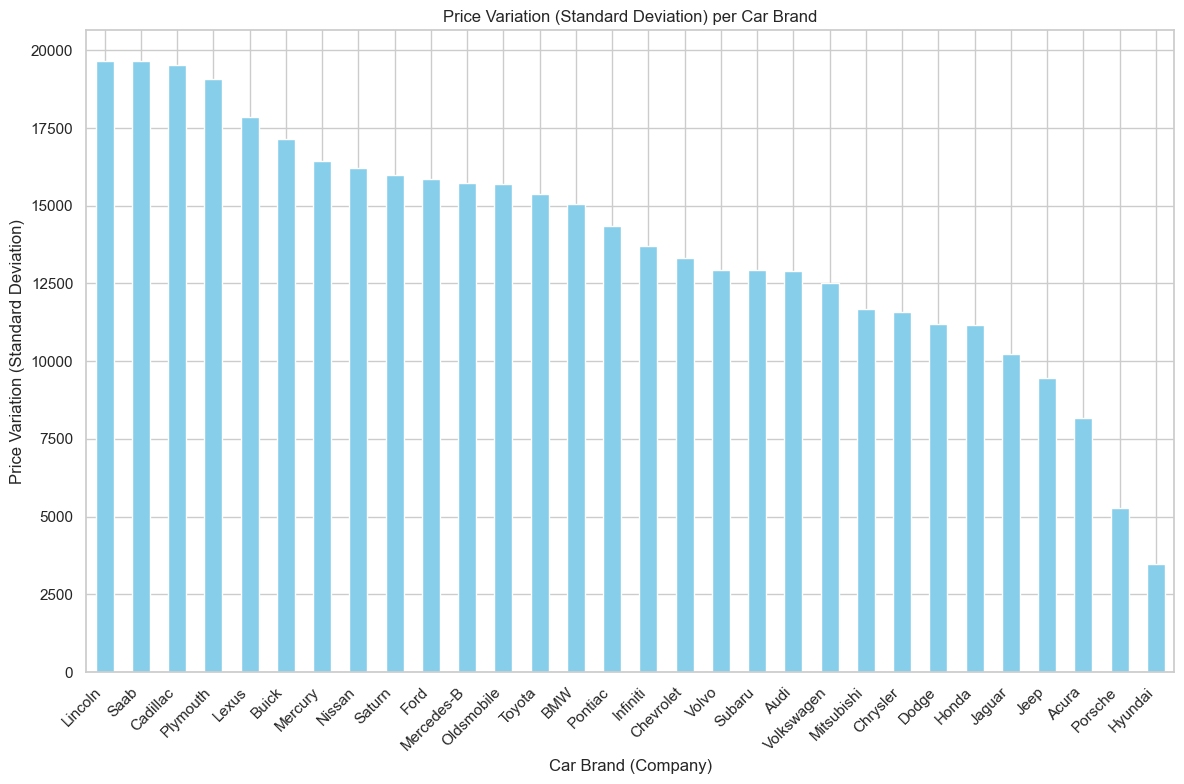

In [47]:
# 2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation_per_company=df.groupby("Company")["Price"].std().sort_values(ascending=False)

highest_variation_company=price_variation_per_company.idxmax()
highest_variation_value=price_variation_per_company.max()

print(f"The car brand with the highest variation in prices is {highest_variation_company} with a standard deviation of {highest_variation_value:.2f}")


plt.figure(figsize=(12,8))
price_variation_per_company.plot(kind="bar", color="skyblue")
plt.title("Price Variation (Standard Deviation) per Car Brand")
plt.xlabel("Car Brand (Company)")
plt.ylabel("Price Variation (Standard Deviation)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

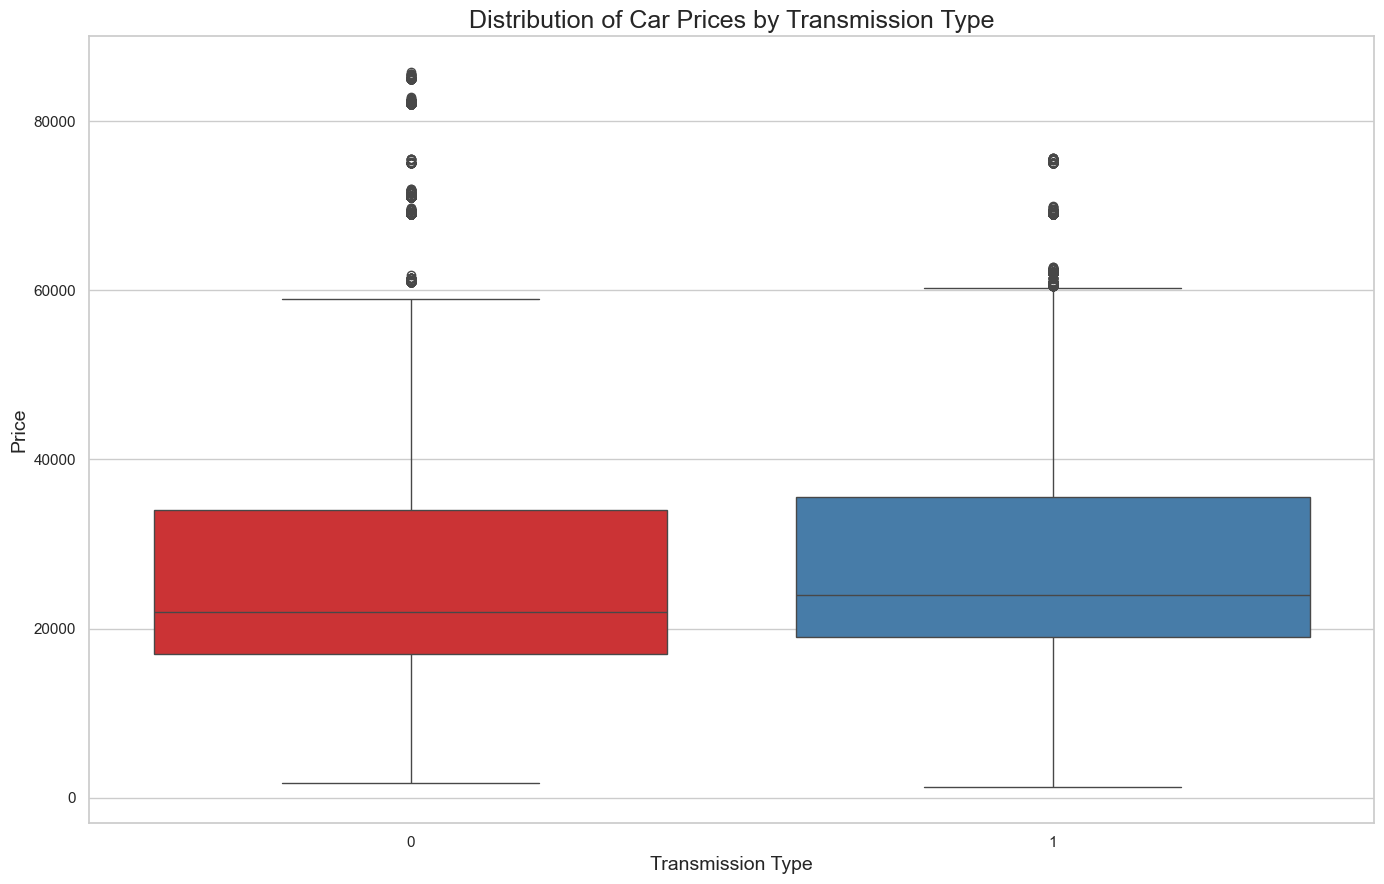

In [48]:
# 3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

df.Transmission.value_counts()

Q1_auto=df[df["Transmission"]==1]["Price"].quantile(0.25)
Q3_auto=df[df["Transmission"]==1]["Price"].quantile(0.75)

IQR_auto=Q3_auto-Q1_auto

Q1_manual=df[df["Transmission"]==0]["Price"].quantile(0.25)
Q3_manual=df[df["Transmission"]==0]["Price"].quantile(0.75)

IQR_auto=Q3_manual-Q1_manual

sns.set(style="whitegrid")

plt.figure(figsize=(14, 9))
sns.boxplot(x="Transmission", y="Price", data=df, palette="Set1")

plt.title("Distribution of Car Prices by Transmission Type", fontsize=18)
plt.xlabel("Transmission Type", fontsize=14)
plt.ylabel("Price", fontsize=14)


plt.tight_layout()
plt.show()


In [49]:
# 4.What is the distribution of car prices across different regions?

price_region_distribution = df.groupby("Dealer_Region")["Price"].describe().sort_values(by="mean", ascending=False)
print(price_region_distribution)


                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   

                   75%      max  
Dealer_Region                    
Austin         35001.0  85601.0  
Aurora         35000.0  85800.0  
Greenville     34500.0  85200.0  
Pasco          34000.0  85600.0  
Scottsdale     33500.0  85001.0  
Middletown     34000.0  85300.0  
Janesville     3

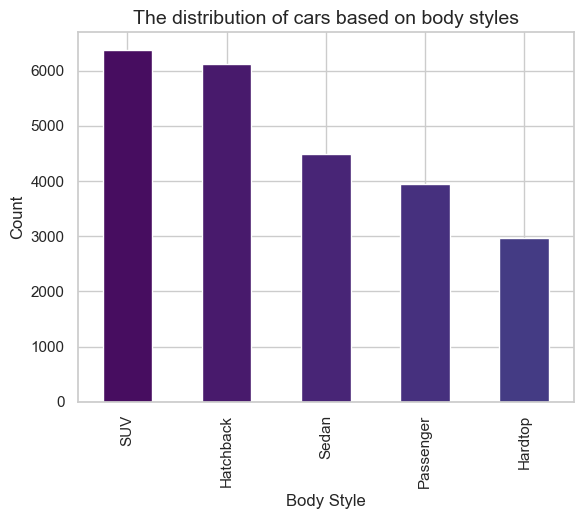

In [50]:
# 5.What is the distribution of cars based on body styles?

distribution_of_car_based_on_body=df["Body Style"].value_counts()
distribution_of_car_based_on_body.plot(kind="bar",color=palette)
plt.title("The distribution of cars based on body styles",fontsize=14)
plt.xlabel("Body Style",fontsize=12)
plt.ylabel("Count")
plt.show()

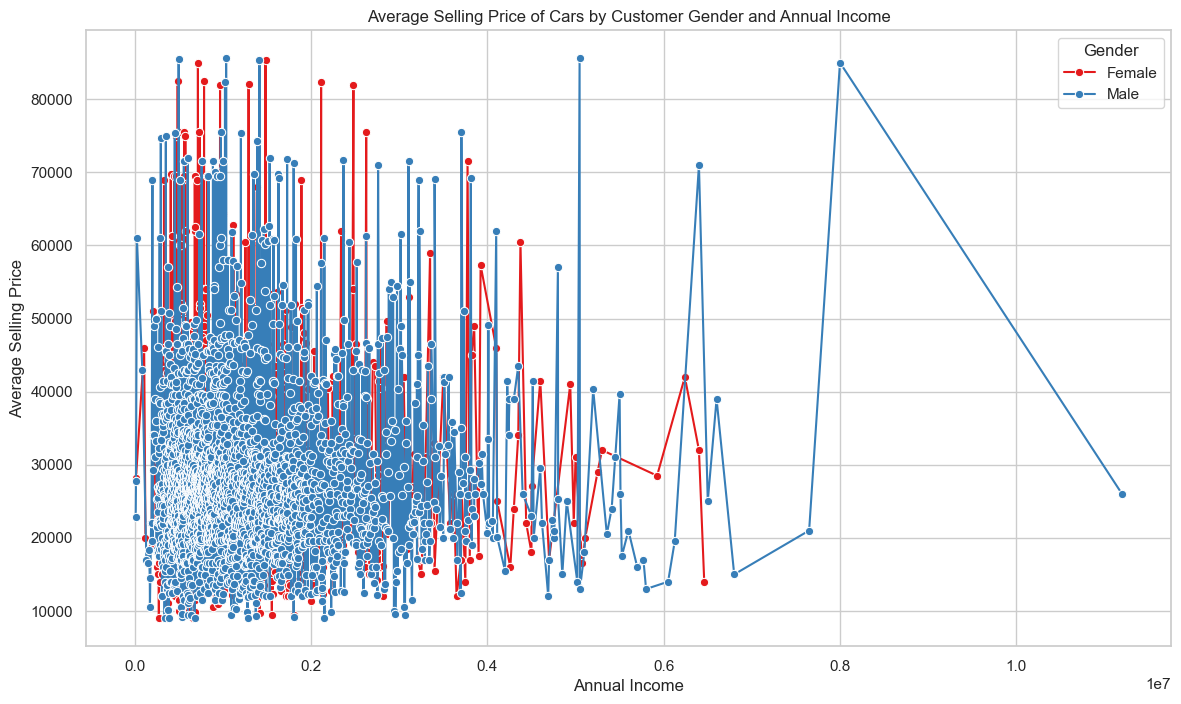

In [51]:
# 6.How does the average selling price of cars vary by customer gender and annual income?

average_price_by_gender_income=df.groupby(["Gender","Annual Income"])["Price"].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_price_by_gender_income, x='Annual Income', y='Price', hue='Gender', marker='o',palette="Set1")
plt.title('Average Selling Price of Cars by Customer Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')
plt.legend(title='Gender')
plt.grid(True)

In [52]:
# 7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?

distribution_of_car_price_by_region=df.groupby("Price")["Dealer_Region"].value_counts()

print(distribution_of_car_price_by_region)



Price  Dealer_Region
1200   Greenville       1
1450   Scottsdale       1
1700   Middletown       1
2200   Middletown       1
4200   Scottsdale       1
                       ..
85400  Janesville       1
85500  Pasco            2
85600  Pasco            2
85601  Austin           1
85800  Aurora           1
Name: count, Length: 2447, dtype: int64


In [53]:
# 8.How does the average car price differ between cars with different engine sizes?

avg_price_by_engine=df.groupby("Engine")["Price"].mean().sort_values(ascending=False)
print(f"Average car price for each engine size :\n {avg_price_by_engine}")

Average car price for each engine size :
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price, dtype: float64


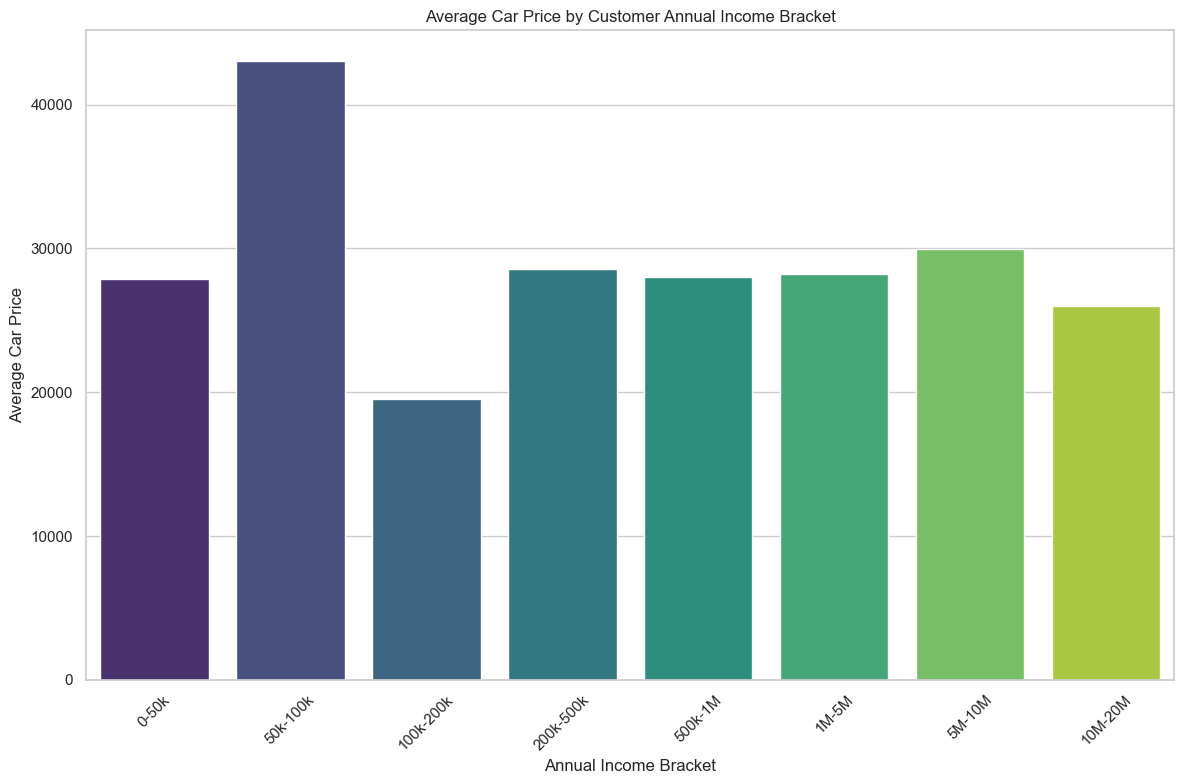

In [54]:
# 9.How do car prices vary based on the customer’s annual income bracket?

bins = [0, 50000, 100000, 200000, 500000, 1000000, 5000000, 10000000, 20000000]
labels = ['0-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-20M']

# Create a new column for income brackets
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, right=False)

# Calculate the average price for each income bracket
avg_price_by_income_bracket = df.groupby('Income Bracket')['Price'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Income Bracket', y='Price', data=avg_price_by_income_bracket, palette='viridis')
plt.title('Average Car Price by Customer Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Car Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

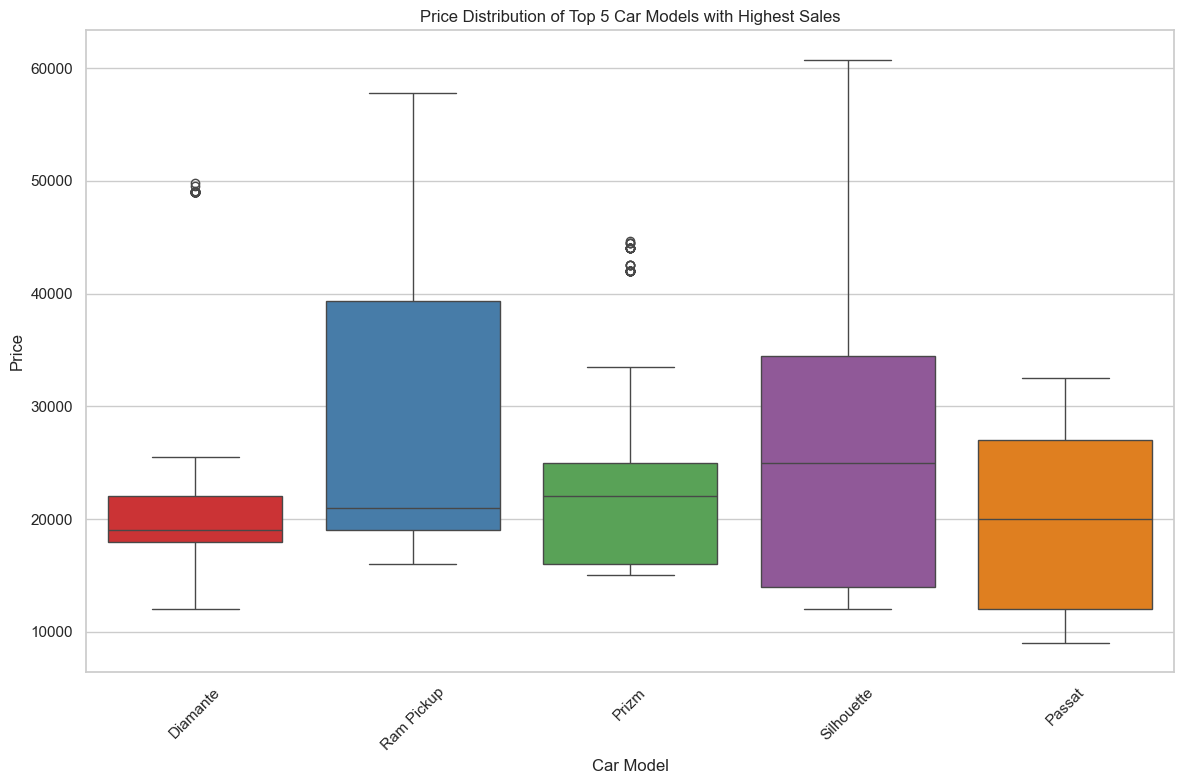


Number of sales for top 5 models:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


In [55]:
# 10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_5_models = df["Model"].value_counts().head(5).index

top_5_models_df = df[df["Model"].isin(top_5_models)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Price', data=top_5_models_df, palette='Set1')
plt.title('Price Distribution of Top 5 Car Models with Highest Sales')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\nNumber of sales for top 5 models:")
print(df["Model"].value_counts().head(5))

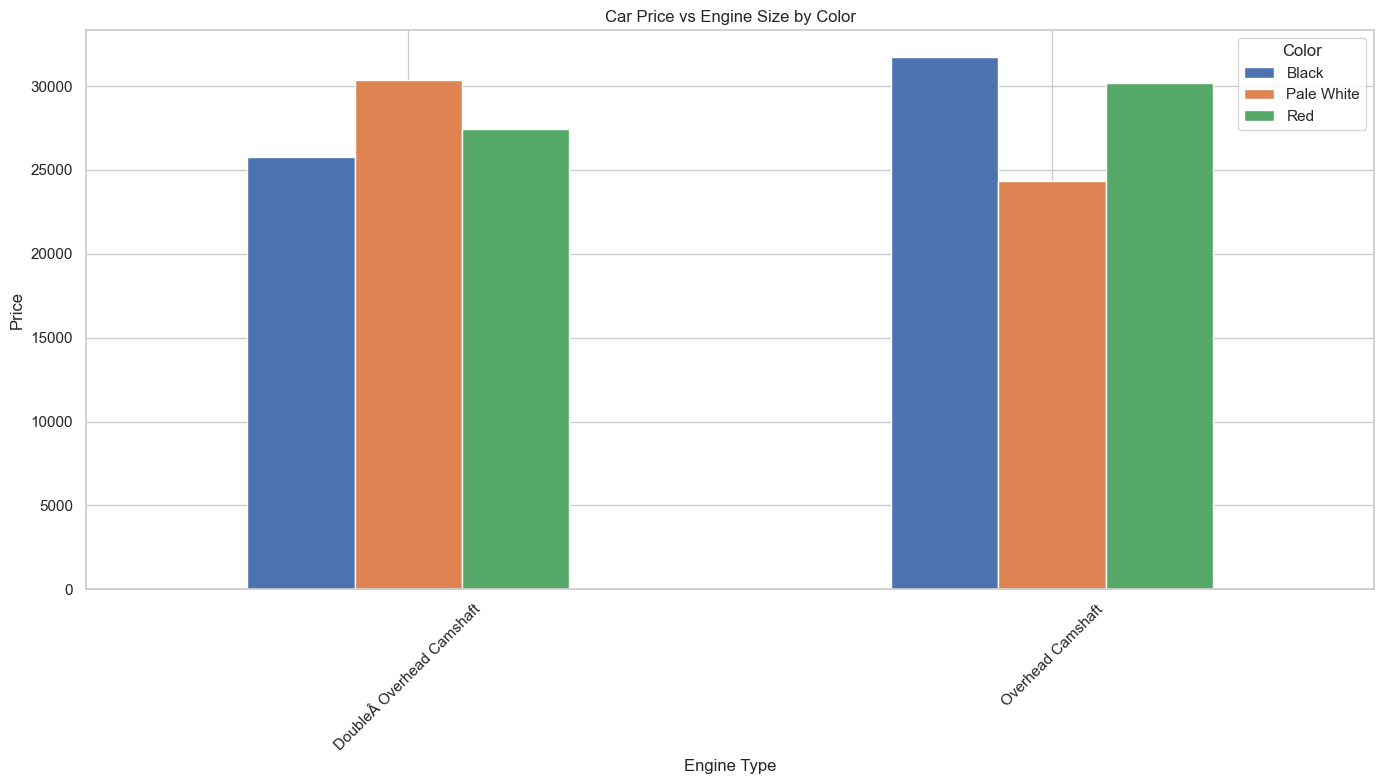

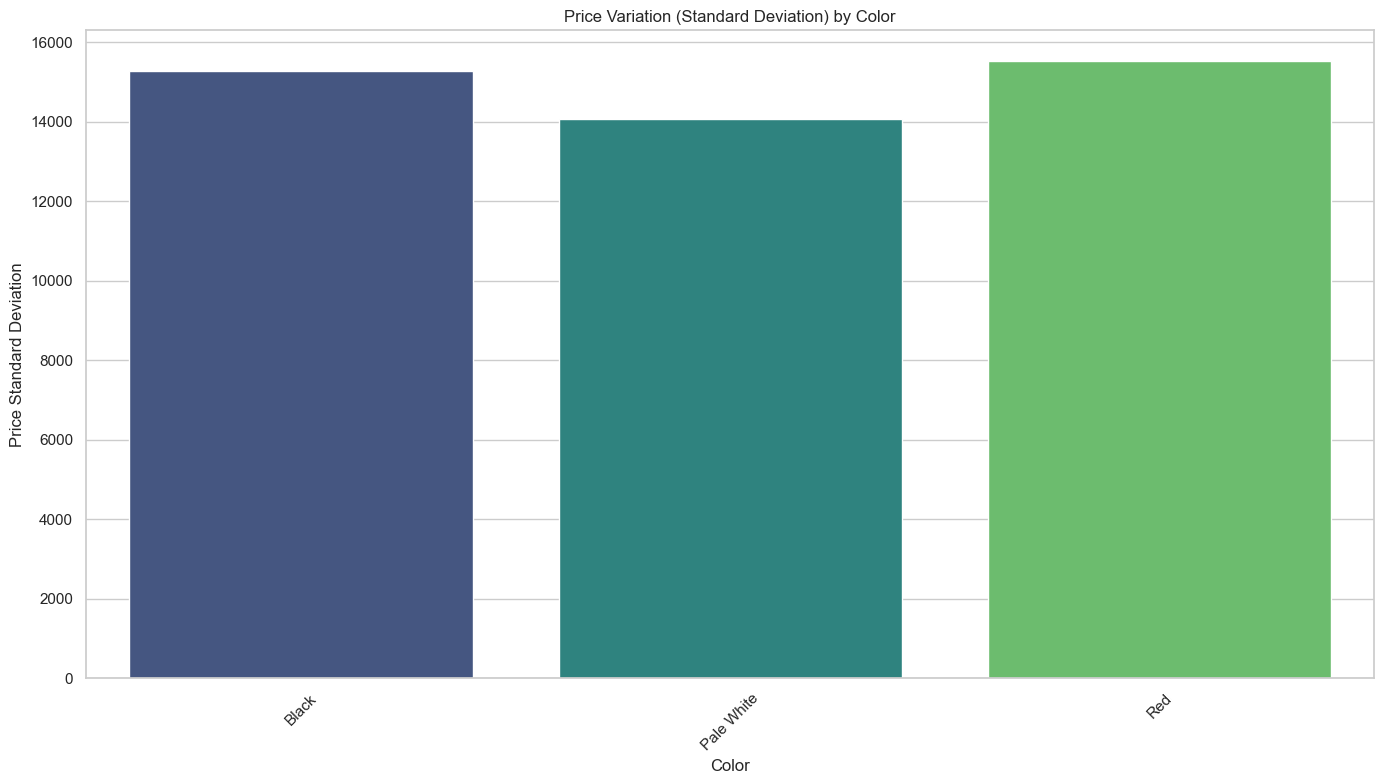

Price variation by color:
        Color  Price Variance
0       Black    15286.065976
1  Pale White    14077.346859
2         Red    15519.360962


In [56]:
# 11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?

price_variation_by_engine_color = df.groupby(["Engine", "Color"])["Price"].mean().unstack()
prices_variance = df.groupby("Color")["Price"].std().reset_index()
prices_variance.columns = ["Color", "Price Variance"]

fig, ax1 = plt.subplots(figsize=(14, 8))
price_variation_by_engine_color.plot(kind="bar", ax=ax1)
ax1.set_title("Car Price vs Engine Size by Color")
ax1.set_xlabel("Engine Type")
ax1.set_ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()

fig, ax2 = plt.subplots(figsize=(14, 8))
sns.barplot(x="Color", y="Price Variance", data=prices_variance, palette="viridis", ax=ax2)
ax2.set_title("Price Variation (Standard Deviation) by Color")
ax2.set_xlabel("Color")
ax2.set_ylabel("Price Standard Deviation")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print("Price variation by color:")
print(prices_variance)

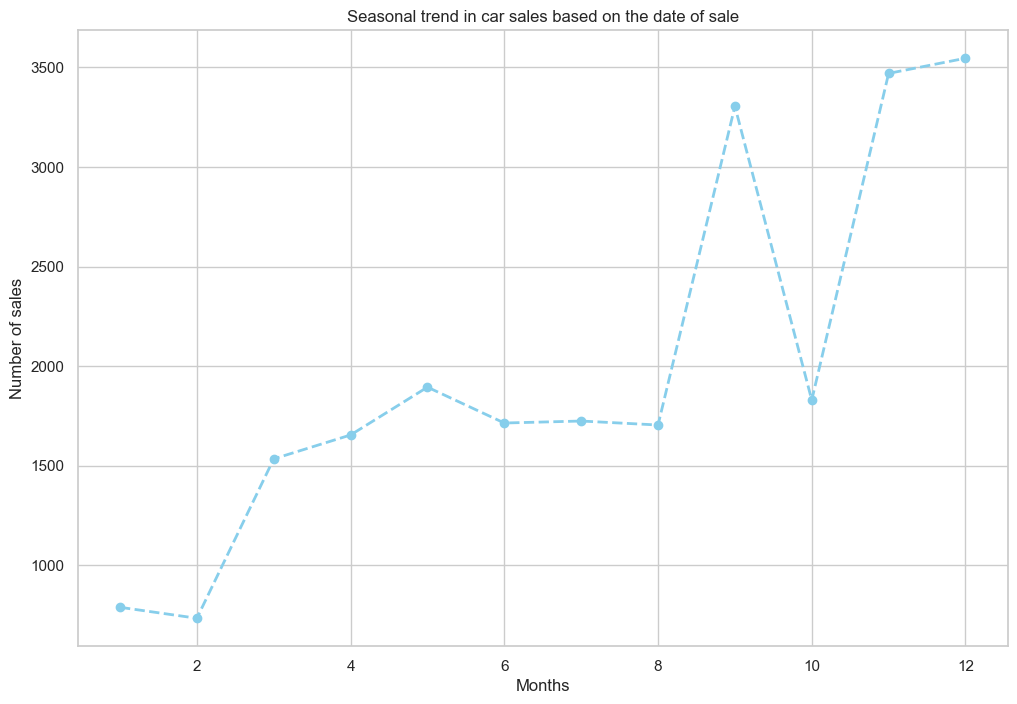

In [57]:
# 12.Is there any seasonal trend in car sales based on the date of sale?

plt.figure(figsize=(12, 8))
Seasonal_trend_in_Car_Sale=df.groupby("month")["Price"].count().plot(kind="line",color="skyblue",marker="o",linestyle="--",linewidth=2)
plt.title("Seasonal trend in car sales based on the date of sale")
plt.xlabel("Months")
plt.ylabel("Number of sales")
plt.show()


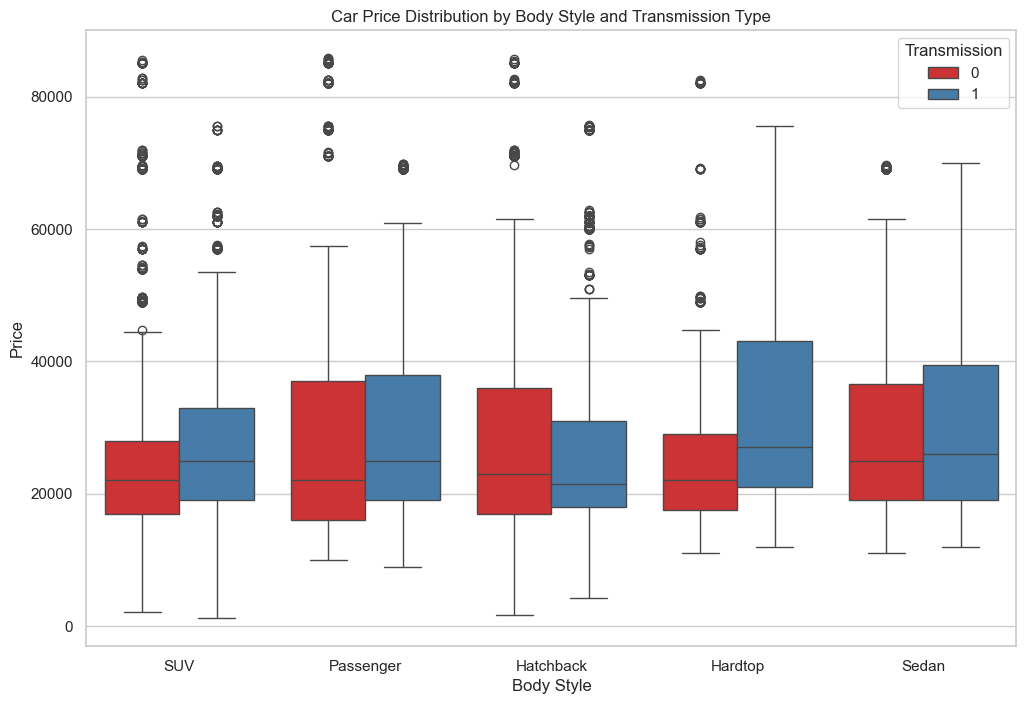

In [58]:
# 13.How does the car price distribution change when considering different combinations of body style and transmission type?

df.groupby(["Body Style", "Transmission"])["Price"].describe()
plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price', hue='Transmission', data=df, palette='Set1')
plt.title('Car Price Distribution by Body Style and Transmission Type') 
plt.xlabel('Body Style')
plt.ylabel('Price') 
plt.show()


                                    Price  Annual Income  \
Price                            1.000000       0.012065   
Annual Income                    0.012065       1.000000   
Engine_Double Overhead Camshaft  0.011271       0.006598   
Engine_Overhead Camshaft        -0.011271      -0.006598   

                                 Engine_Double Overhead Camshaft  \
Price                                                   0.011271   
Annual Income                                           0.006598   
Engine_Double Overhead Camshaft                         1.000000   
Engine_Overhead Camshaft                               -1.000000   

                                 Engine_Overhead Camshaft  
Price                                           -0.011271  
Annual Income                                   -0.006598  
Engine_Double Overhead Camshaft                 -1.000000  
Engine_Overhead Camshaft                         1.000000  


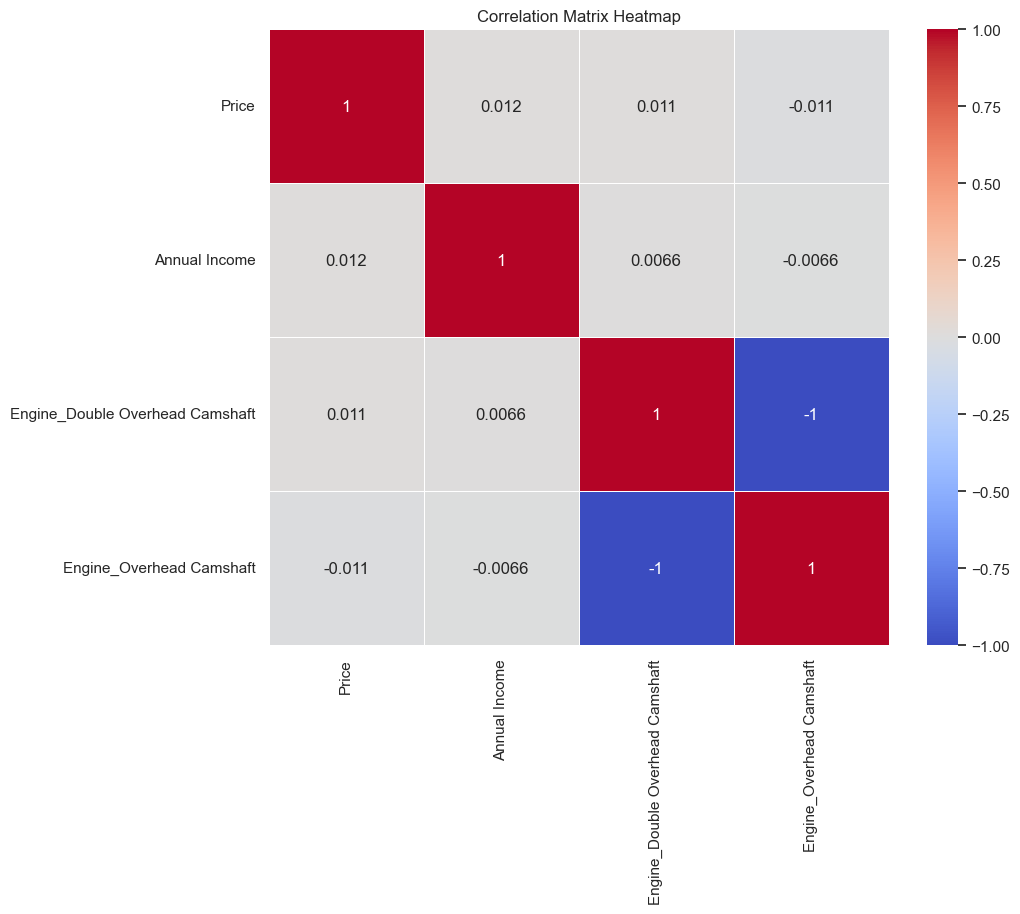

In [59]:
# 14.What is the correlation between car price, engine type, and annual income of customers, and how do these features interact?

df['Engine'] = df['Engine'].str.replace('Â\xa0', ' ', regex=False)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
engine_encoded = encoder.fit_transform(df[['Engine']]).toarray()
engine_encoded_df = pd.DataFrame(engine_encoded, columns=encoder.get_feature_names_out(['Engine']))
df_encoded = pd.concat([df, engine_encoded_df], axis=1)
df_encoded.drop('Engine', axis=1, inplace=True)
correlation_matrix = df_encoded[['Price', 'Annual Income'] + list(engine_encoded_df.columns)].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


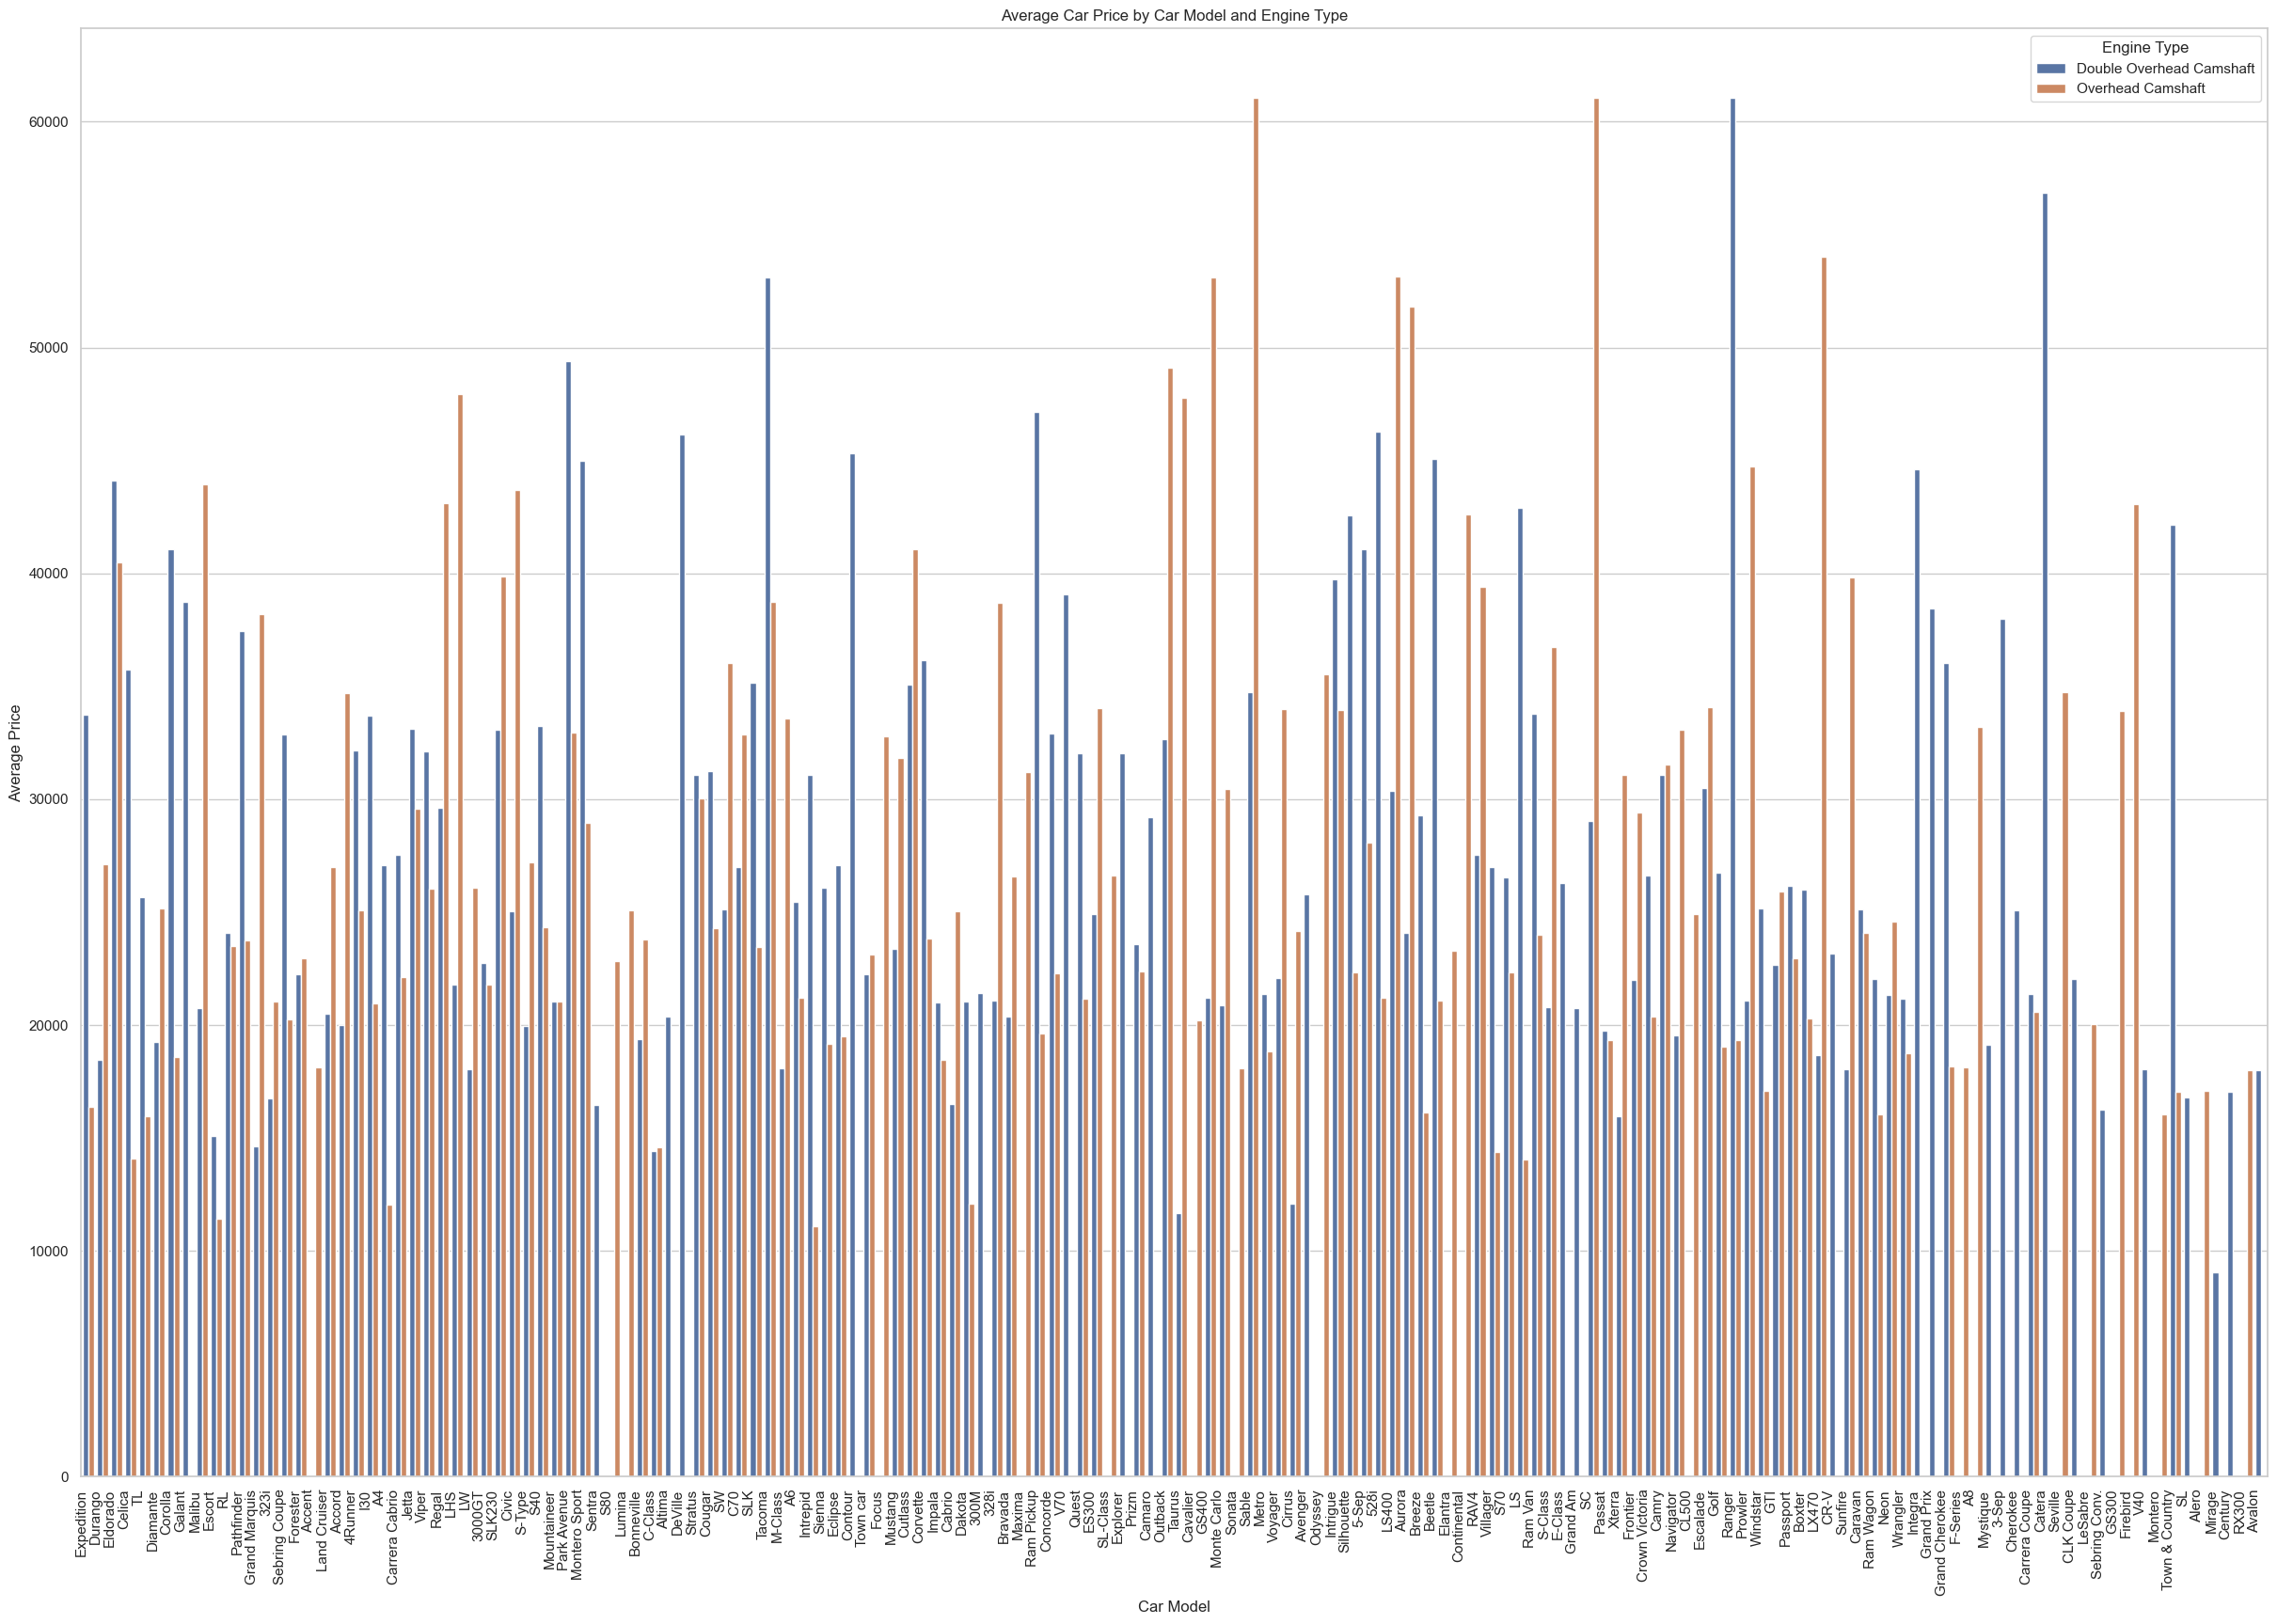

In [60]:
# 15.How does the average car price vary across different car models and engine types?

average_car_price=df.groupby(["Model", "Engine"])["Price"].mean()

plt.figure(figsize=(30, 20))
sns.barplot(x='Model', y='Price', hue='Engine', data=df, estimator=np.mean, ci=None)
plt.title('Average Car Price by Car Model and Engine Type')
plt.xticks(rotation=90,ha="right")
plt.xlabel('Car Model')
plt.ylabel('Average Price')
plt.legend(title='Engine Type')
plt.show()


In [61]:
df.columns

Index(['Car_id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style',
       'Phone', 'Dealer_Region', 'Day', 'month', 'year', 'Dealer_No', 'Price',
       'Income Bracket'],
      dtype='object')

In [62]:
df.Engine.unique()

array(['Double Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [63]:
df

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Body Style,Phone,Dealer_Region,Day,month,year,Dealer_No,Price,Income Bracket
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,1,Black,SUV,8264678,Middletown,2,1,2022,64573834,26000,0-50k
1,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,1,Black,SUV,6848189,Aurora,2,1,2022,605047114,19000,1M-5M
2,C_CND_000003,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,0,Red,Passenger,7298798,Greenville,2,1,2022,387018047,31500,1M-5M
3,C_CND_000004,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,0,Pale White,SUV,6257557,Pasco,2,1,2022,993013882,14000,0-50k
4,C_CND_000005,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,1,Red,Hatchback,7081483,Janesville,2,1,2022,535469427,24500,1M-5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,0,Red,Passenger,8583598,Pasco,31,12,2023,605047114,12000,0-50k
23902,C_CND_023903,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Double Overhead Camshaft,1,Black,Hardtop,7914229,Middletown,31,12,2023,64573834,16000,500k-1M
23903,C_CND_023904,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,0,Red,Sedan,7659127,Scottsdale,31,12,2023,993013882,21000,500k-1M
23904,C_CND_023905,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,Double Overhead Camshaft,1,Black,Passenger,6030764,Austin,31,12,2023,535469427,31000,0-50k


# EDA 3

## Description: 
### This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.   

## Features: 
### product_id: Unique identifier for each product 
### product_name: Name of the product 
### category: Category of the product 
### discounted_price: Discounted price of the product 
### actual_price: Actual price of the product 
### discount_percentage: Percentage of discount for the product 
### rating: Rating of the product (1-5) 
### rating_count: Number of people who voted for the Amazon rating 
### about_product: Description about the product 
### user_id: ID of the user who wrote the review 
### user_name: Name of the user who wrote the review 
### review_id: ID of the user review 
### review_title: Short review 
### review_content: Long review 
### mg_link: Image link of the product 
### product_link: Official website link of the product  

In [64]:
df.dtypes
df=pd.read_csv("amazon.csv")

In [65]:
df.discounted_price
df["discounted_price"]=df["discounted_price"].str.replace("₹","")
df["discounted_price"]=df["discounted_price"].str.replace(",","")
df["discounted_price"]=df["discounted_price"].astype(float)


In [66]:
df.actual_price
df["actual_price"]=df["actual_price"].str.replace("₹","")
df["actual_price"]=df["actual_price"].str.replace(",","")
df["actual_price"]=df["actual_price"].astype(float)


In [67]:
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "")
df["discount_percentage"] = df["discount_percentage"].astype(int)


In [68]:
df["rating"] = pd.to_numeric(df["rating"], errors='coerce')
df.dropna(subset=["rating"], inplace=True)
df["rating"] = df["rating"].astype(int)


In [69]:
df.rating_count
df["rating_count"]=df["rating_count"].str.replace(",","")
df["rating_count"]=df["rating_count"].astype(float)


In [70]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                   int64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

## Questions?


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [72]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.medi

In [73]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                   int64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [74]:
#1.What is the average rating for each product category?

average_rating_for_each_product=df.groupby("category")["rating"].mean()
print(average_rating_for_each_product)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.0
                                                                                                                         ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRoller

In [75]:
# 2.What are the top rating_count products by category?

top_rating_count_product_by_category=df.groupby("category")["rating_count"].max()
print(top_rating_count_product_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                     1118.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                    4426.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                            7222.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        14969.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                            7352.0
                                                                                                                           ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         5792.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|

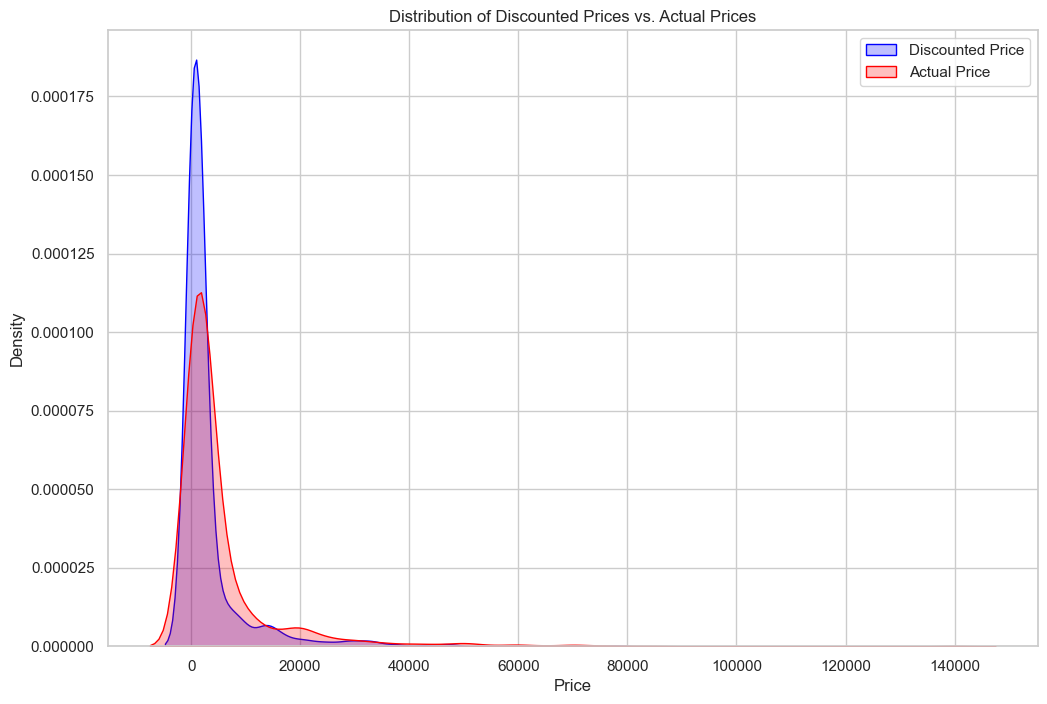

In [76]:
# 3.What is the distribution of discounted prices vs. actual prices?

plt.figure(figsize=(12, 8))
sns.kdeplot(df['discounted_price'], color='blue', label='Discounted Price', shade=True)
sns.kdeplot(df['actual_price'], color='red', label='Actual Price', shade=True)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [77]:
# 4. How does the average discount percentage vary across categories?

average_discount_percentage = df.groupby("category")["discount_percentage"].mean()
print(average_discount_percentage)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

In [78]:
# 5.What are the most popular product names?
most_popular_product_name=df.product_name.value_counts().head(5)
print(most_popular_product_name)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                      4
Portronics Konnect L POR-1081 Fast Charging 3A Type-C Cable 1.2Meter with Charge & Sync Function for All Type-C Devices (Grey)                                                        3
Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating    3
Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black                                                                                3
Name: count, dtype: int64


In [79]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.medi

In [80]:
# 6.What are the most popular product keywords?

from collections import Counter
words = df["product_name"].str.split().explode()
word_counts = Counter(words)
keywords_df = pd.DataFrame(word_counts.items(), columns=["keyword", "count"]).sort_values(by="count", ascending=False)
print(keywords_df)

       keyword  count
71        with    717
13         for    614
211          |    457
43           &    431
3          USB    342
...        ...    ...
6399      1212      1
2848     Paint      1
2849   Canvas,      1
2850     Wood,      1
2851  Leather,      1

[6431 rows x 2 columns]


In [81]:
# 7.What are the most popular product reviews?

most_popular_product_name=df.groupby("product_name")["review_title"].value_counts().sort_values(ascending=False)
print(most_popular_product_name)

product_name                                                                                                                                                                        review_title                                                                                                                                                                                                                                                                                                                
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                           Worth the money,Good smart watch,the screen does not turn on and off on double tap, for that you have to press the button.,User friendly UI,Best Allrounder Budget SmartWatch Under 2K 🔥,This smart watch is awesome,Nice watch in budget,The step count is not that accurate but the call quality and other things are good    5
F

In [82]:
# 8.What is the correlation between discounted_price and rating?

correlation_matrix=df[["discounted_price","rating"]].corr()
print(correlation_matrix)

                  discounted_price   rating
discounted_price           1.00000  0.11432
rating                     0.11432  1.00000


In [83]:
# 9.What are the Top 5 categories based on the highest ratings?

top_5_categories_based_on_highest_rating=df.groupby("category")["rating"].mean().sort_values(ascending=False).head(5)
print(top_5_categories_based_on_highest_rating)

category
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                         4.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams              4.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                 4.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables                          4.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|MousePads    4.0
Name: rating, dtype: float64


In [84]:
# 10.Identify any potential areas for improvement or optimization based on the data analysis.

'''
i think discounted price and actual price should be increase between 10% to 20% because the rating is high and the rating count is also high

'''

'\ni think discounted price and actual price should be increase between 10% to 20% because the rating is high and the rating count is also high\n\n'

In [85]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

# EDA 4


# Description of the Dataset: 
### The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of 
### approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile 
### the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. 
### Each entry not only highlights the popularity and musical composition of the tracks but also underscores the 
### creative prowess of the artists and their profound impact on global listeners.  

# Application in Data Science: 
### This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend 
### analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset 
### enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's 
### evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at 
### forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.


## Column Descriptors:  
### Artist: The name of the artist, providing direct attribution to the creative mind behind the track. 
### Track Name: The title of the track, encapsulating its identity and essence. 
### Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners. 
### Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience. 
### Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further exploration. 

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [87]:
df=pd.read_csv("spotify.csv")

In [88]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [89]:
df.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

# Questions:

In [90]:
# 1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?

null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)
df.drop_duplicates(inplace=True)  


Null values in each column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27


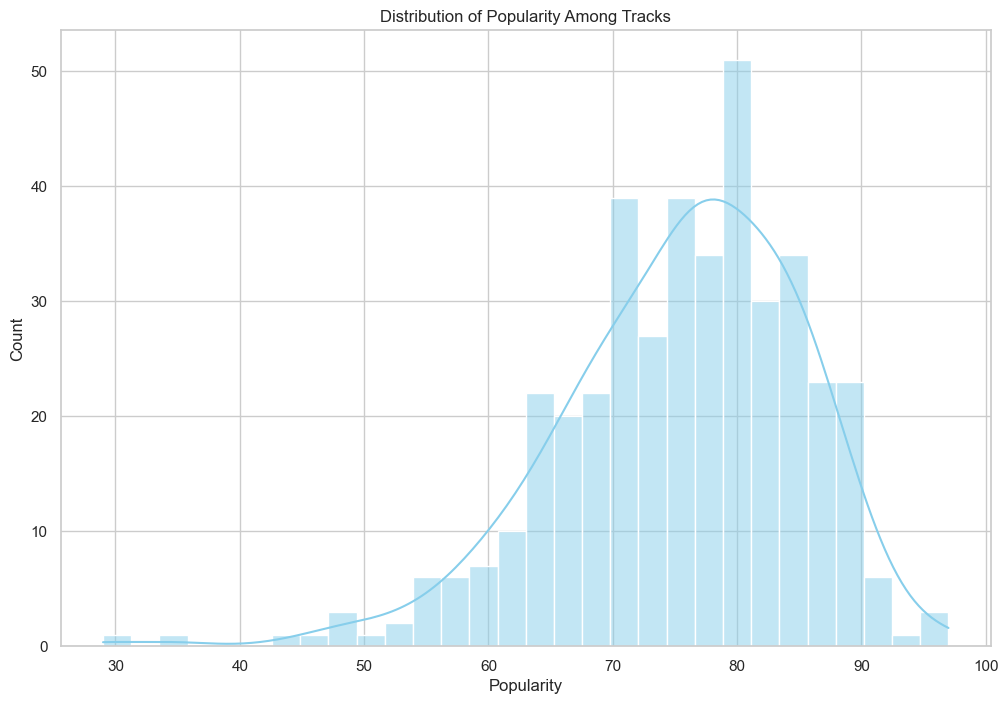

In [91]:
# 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

distribution_of_popularity=df["Popularity"].value_counts()
plt.figure(figsize=(12, 8))
sns.histplot(df['Popularity'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()



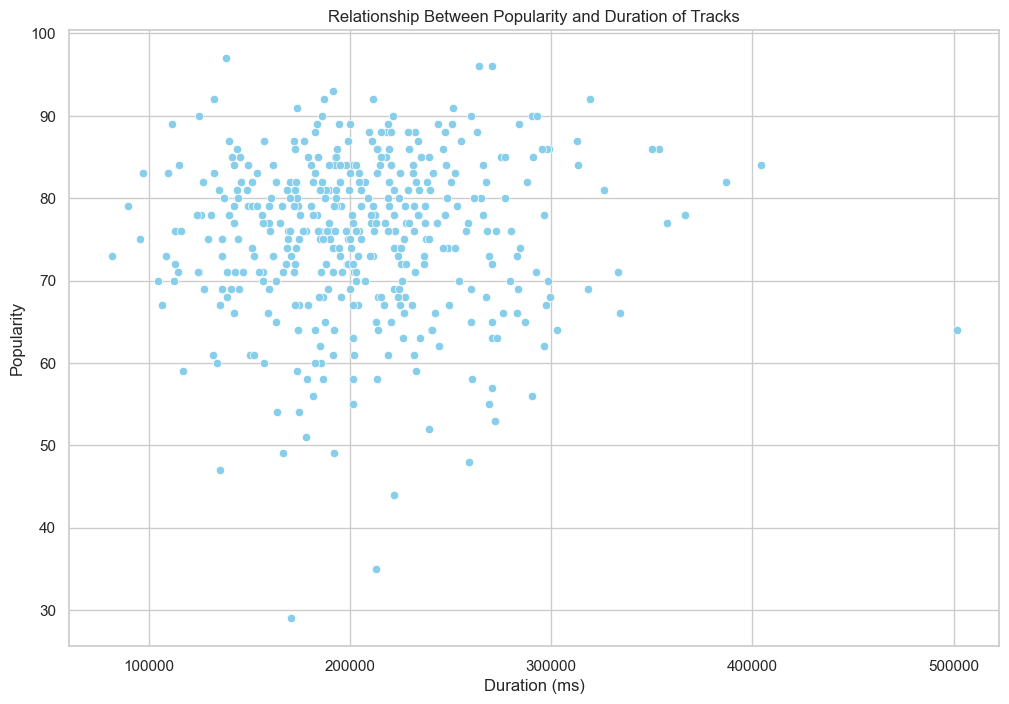

In [92]:
# 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

plt.figure(figsize=(12, 8))
sns.scatterplot(x="Duration (ms)", y="Popularity", data=df, color='skyblue')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

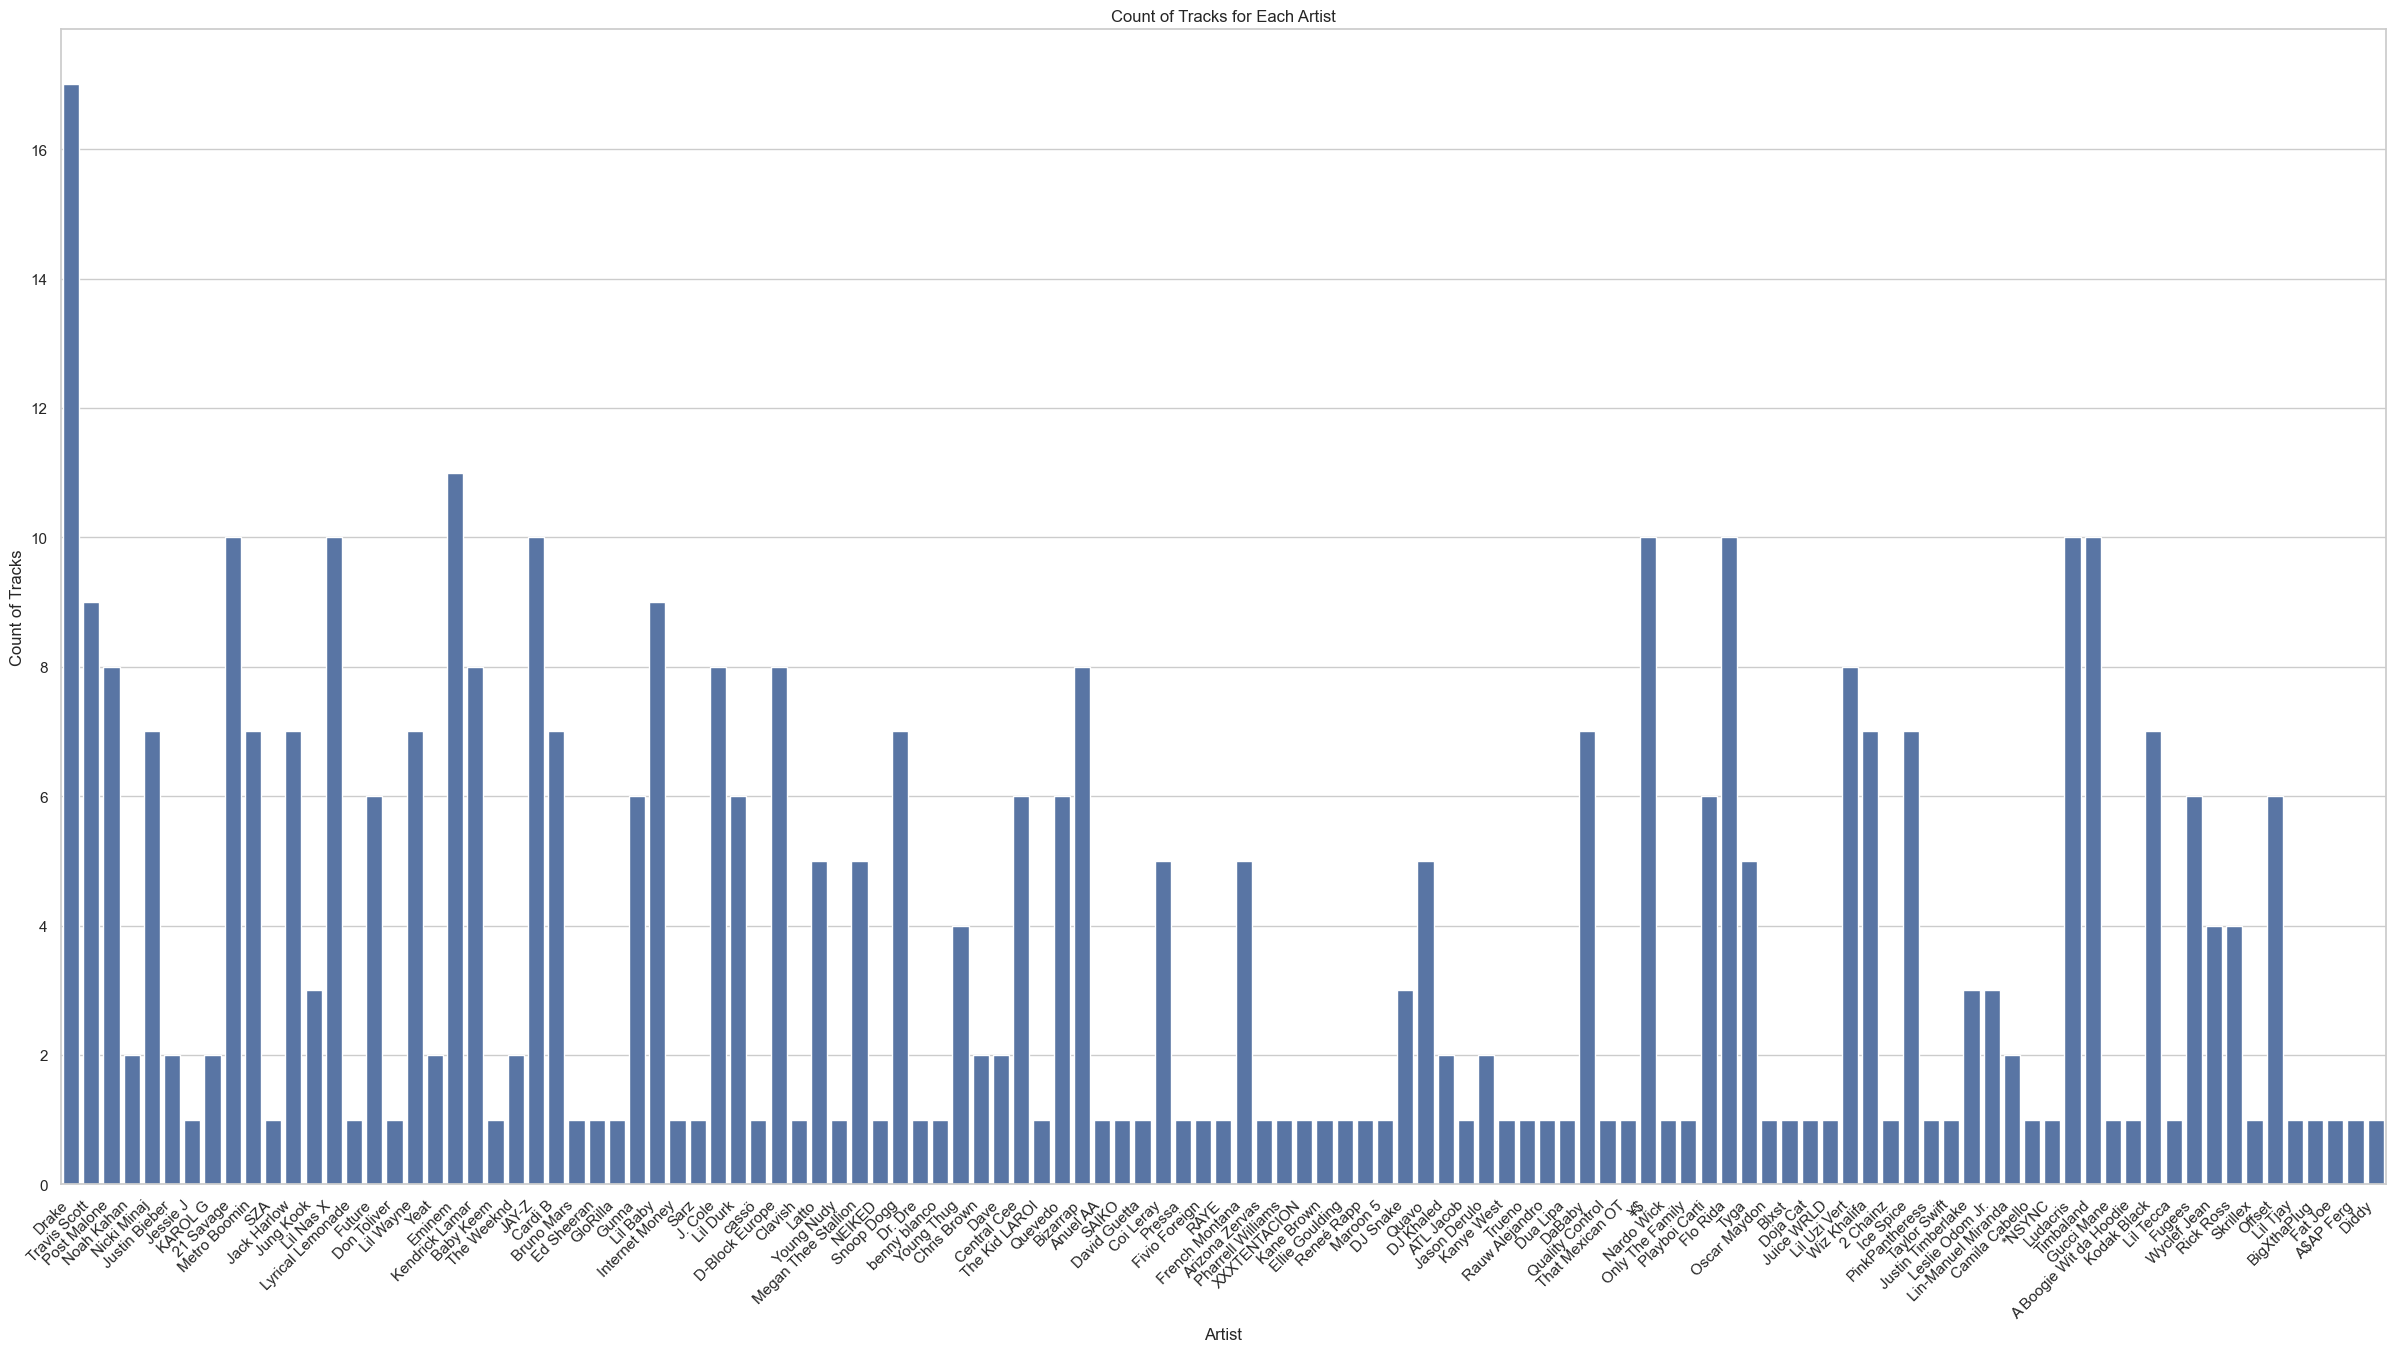

In [93]:
# 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

plt.figure(figsize=(30, 15))
sns.countplot(x="Artist", data=df)
plt.xticks(rotation=45,ha="right")
plt.title("Count of Tracks for Each Artist")
plt.xlabel("Artist")
plt.ylabel("Count of Tracks")
plt.show()

In [94]:
# 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

top_5_least_popular_tracks=df.nsmallest(5,"Popularity")[["Artist","Track Name"]]
print(top_5_least_popular_tracks)


             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


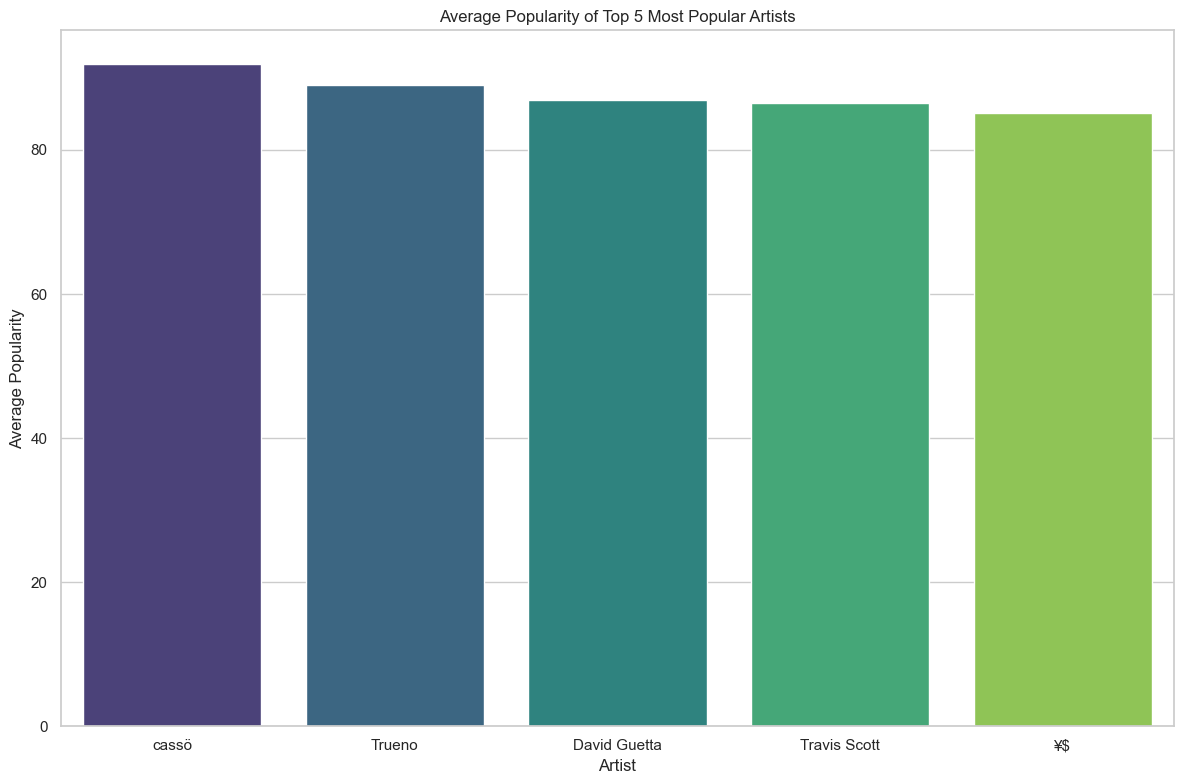

In [95]:
# 6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and 
# display the average popularity for each artist.

top_5_most_popular_artists=df.groupby("Artist")["Popularity"].mean().nlargest(5)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_most_popular_artists.index, y=top_5_most_popular_artists.values, palette='viridis')
plt.title('Average Popularity of Top 5 Most Popular Artists')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

In [96]:
# 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

top_5_artists = top_5_most_popular_artists.index.tolist()
top_5_most_popular_artists_tracks = df[df['Artist'].isin(top_5_artists)].sort_values(by='Popularity', ascending=False).groupby('Artist').first()
print(top_5_most_popular_artists_tracks[['Track Name', 'Popularity']])

                                Track Name  Popularity
Artist                                                
David Guetta            Baby Don't Hurt Me          87
Travis Scott    FE!N (feat. Playboi Carti)          93
Trueno        Mamichula - con Nicki Nicole          89
cassö                                Prada          92
¥$                                CARNIVAL          96


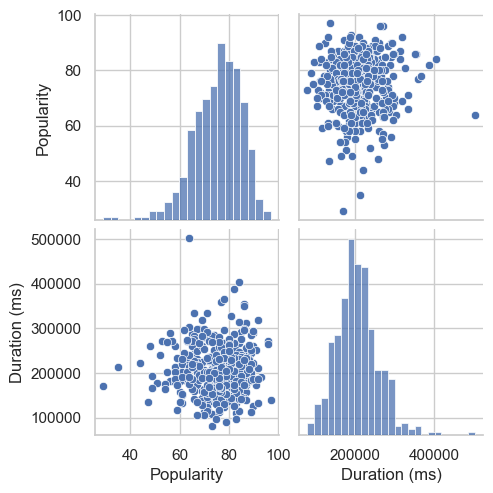

In [97]:
# 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot

numerical_df = df.select_dtypes(include=[int, float])
sns.pairplot(numerical_df)
plt.show()


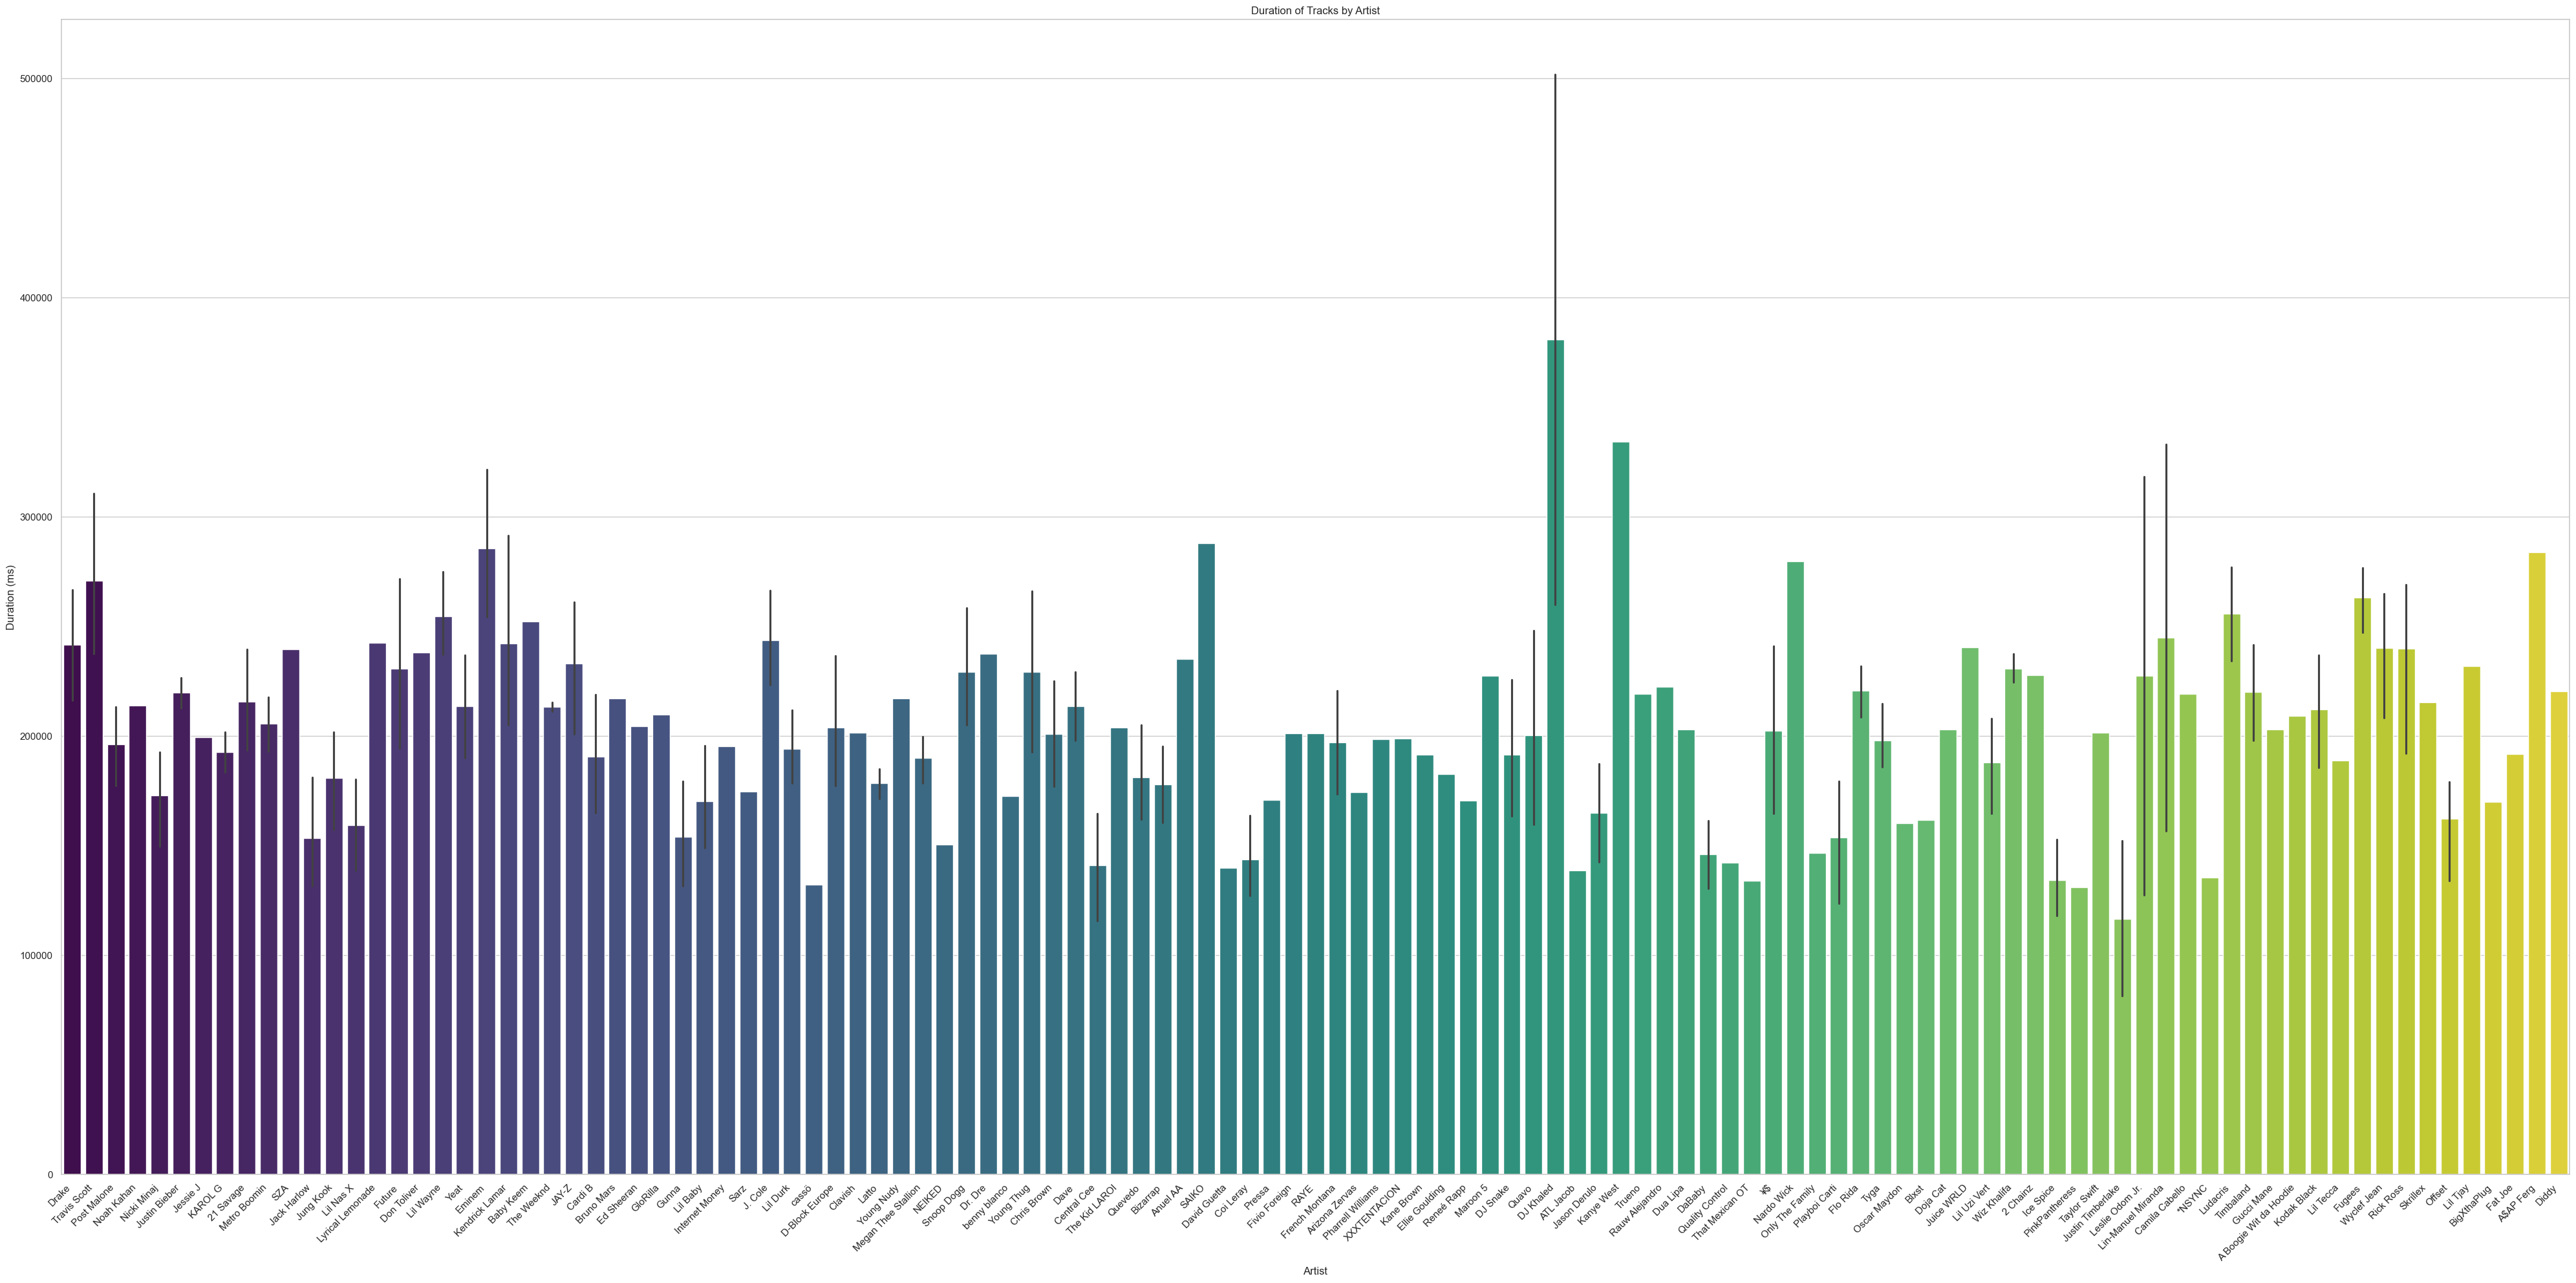

In [98]:
# 9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

plt.figure(figsize=(40, 20))
sns.barplot(x="Artist", y="Duration (ms)", data=df, palette="viridis")
plt.title("Duration of Tracks by Artist")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

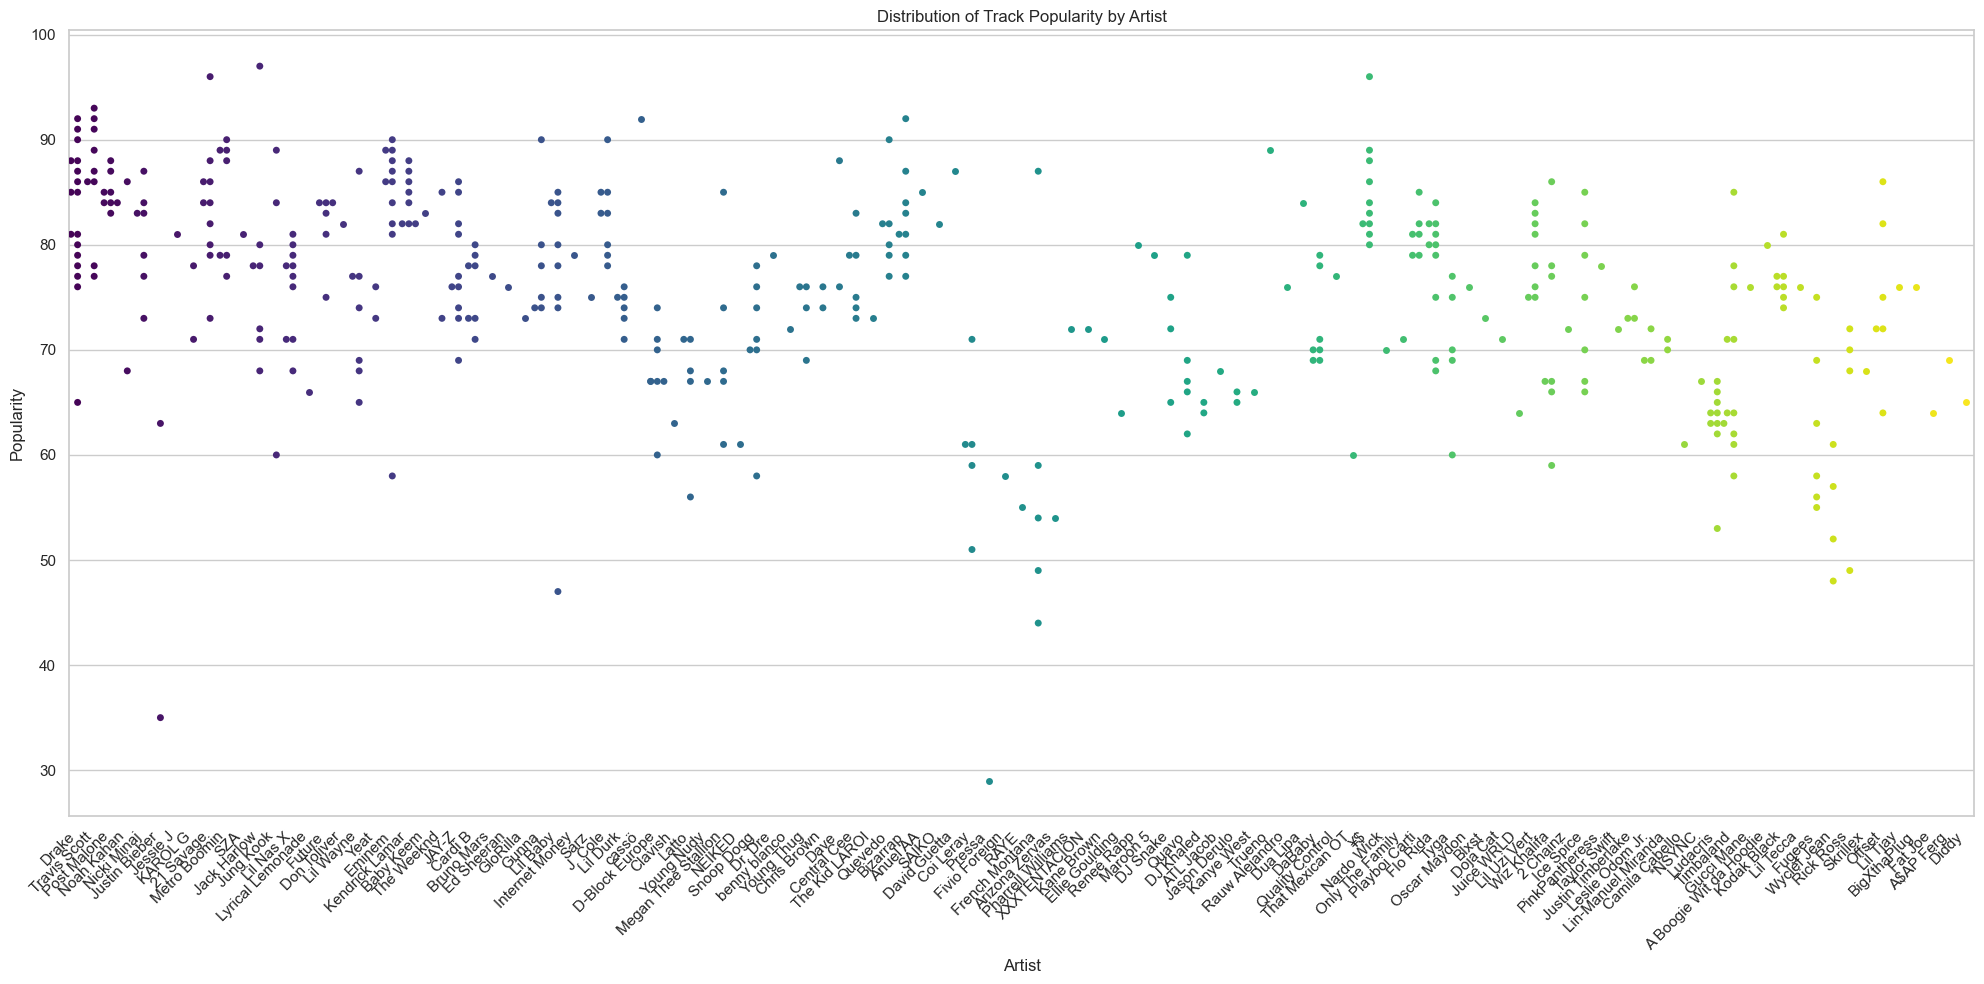

In [99]:
#How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

distribution_of_track_popularity = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.swarmplot(x='Artist', y='Popularity', data=df, palette='viridis')
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [100]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
